In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import re

In [2]:
# Importing dataset
df = pd.read_csv('Social_enterpreneurship_dataset.csv')

In [3]:
# Explore dataset (first glance)
df.head()

,project_name,project_location,project_founder,fund_goal,fund_currency,fund_progress,fund_date_end,fund_supporter,category,goal_tipping point,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,"Philadelphia, United States",Bianca Nikol Roberson Memorial Foundation Inc ...,"25,000",USD,"4,142","'Fundraising ended on Mar 27, 2019",56.0,Civic;Community;Social Enterprise;,"25,000",...,3.08,1.03,0.0,0.00,1.03,0.00,0.68,1.37,0.00,0.68
1,Help People with a Disability in Maleny,"Maleny, Sunshine Coast, Queensland, Australia",Kristine FitzGerald,"20,000",AUD,"2,811","'Fundraising ended on Apr 08, 2018",26.0,Arts & Culture;Community;Social Enterprise;,"20,000",...,5.05,0.51,0.0,0.25,0.00,0.76,0.00,0.00,0.00,0.00
2,You Can Help Us Launch The Priceless Campaign,Lancaster,The Priceless Campaign,"2,200",USD,"1,345","'Fundraising ended on Dec 23, 2012",13.0,Children & Youth;,"2,200",...,4.64,0.00,0.0,0.71,3.21,1.07,0.71,0.00,0.00,1.43
3,"""It is not the mountain we conquer but ourselv...","Lindome , Sweden",Josefine Steenari,"30,000",SEK,"2,400","'Fundraising ended on May 30, 2018",6.0,Civic;Community;Human Rights;,"30,000",...,3.06,1.53,0.0,0.00,0.92,0.71,1.02,0.71,0.82,3.06
4,#APATCE - Empowering Tourism for All,"Canberra, Australia",getaboutable.com,"20,000",AUD,"20,090","'Nov 15, 2019",74.0,Arts & Culture;Human Rights;Social Enterprise;,"20,000",...,4.01,1.08,0.0,0.00,0.15,2.00,0.31,2.00,1.85,6.16


In [4]:
# Explore dataset - shape
df.shape

(1474, 105)

## Choosing and renaming columns

In [5]:
# Explore column names and null values
df.isna().sum().head()

project_name        0
project_location    0
project_founder     0
fund_goal           0
fund_currency       0
dtype: int64

In [6]:
# Selection of relevant columns
df = df[['project_name', 'project_founder', 'project_location', 'category', 'fund_date_end', 'fund_currency', 'fund_goal', 'goal_tipping point', 'goal_stretch point', 'fund_progress', 'percentagefunded', 'percstretch', 'fund_supporter', 'Word_count']]
df.shape

(1474, 14)

In [7]:
# Renaming columns
df.columns = ['title', 'founder', 'location', 'topic', 'year', 'currency', 'funding_goal', 'funding_goal_tipping_point', 'funding_goal_stretch_point', 'funding_raised', 'percentage_of_goal', 'percentage_of_goal_stretch', 'number_of_supporters', 'word_count_description']

In [8]:
# Check renaming success
df.columns

Index(['title', 'founder', 'location', 'topic', 'year', 'currency',
       'funding_goal', 'funding_goal_tipping_point',
       'funding_goal_stretch_point', 'funding_raised', 'percentage_of_goal',
       'percentage_of_goal_stretch', 'number_of_supporters',
       'word_count_description'],
      dtype='object')

# Checking for and handling null values

In [9]:
# check for null values per column
df.isna().sum()

title                          0
founder                        0
location                       0
topic                          1
year                           0
currency                       0
funding_goal                   0
funding_goal_tipping_point     0
funding_goal_stretch_point     0
funding_raised                 0
percentage_of_goal             0
percentage_of_goal_stretch     0
number_of_supporters           6
word_count_description        36
dtype: int64

In [10]:
# check for null values per row
df.isna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1469    0
1470    0
1471    0
1472    0
1473    0
Length: 1474, dtype: int64

#### Topic & number_of_supporters

In [11]:
# Display rows with null values in column 'topic'
null_values_topic = df[df['topic'].isna()]
print(null_values_topic)

                                     title  \
200  Cancer Chemo Hope and Healing Baskets   

                                            founder                 location  \
200  Pink Pearls of Hope Breast Cancer Organization  Cerritos, United States   

    topic                                year currency funding_goal  \
200   NaN  'Fundraising ended on Feb 13, 2016      USD        2,050   

    funding_goal_tipping_point funding_goal_stretch_point funding_raised  \
200                      2,050                      5,000            300   

    percentage_of_goal percentage_of_goal_stretch  number_of_supporters  \
200            0.14634                    0.06000                   5.0   

     word_count_description  
200                   487.0  


In [12]:
df.iloc[200]

title                                  Cancer Chemo Hope and Healing Baskets
founder                       Pink Pearls of Hope Breast Cancer Organization
location                                             Cerritos, United States
topic                                                                    NaN
year                                      'Fundraising ended on Feb 13, 2016
currency                                                                 USD
funding_goal                                                           2,050
funding_goal_tipping_point                                             2,050
funding_goal_stretch_point                                             5,000
funding_raised                                                           300
percentage_of_goal                                                   0.14634
percentage_of_goal_stretch                                           0.06000
number_of_supporters                                                     5.0

In [13]:
# Display rows with null values in column 'number_of_supporters' as NOS
null_values_NOS = df[df['number_of_supporters'].isna()]
print(null_values_NOS)

                                               title  \
263           CommuniToy - Help us 'make' the future   
364    Economic empowerment for HIV and AIDS Victims   
713                                    House of Hope   
741   InstantTutor: Online Tutoring for Foster Youth   
1051        RAYSE Up Atlanta Lunch for the Homeless    
1428                                      We Recycle   

                                 founder                      location  \
263                     Exploring Senses                      Brighton   
364   Developing African Youths-Cameroon                       Bamenda   
713                       arno chappatte                Recife, Brazil   
741        Educational Tutorial Services                    Pittsburgh   
1051                  Anna Moore-Johnson        Atlanta, United States   
1428                         Phila Vocia  Atlantic City, United States   

                                               topic  \
263                             

In [14]:
# store min value to replace null values
fill = min(df.number_of_supporters)
fill

2.0

In [15]:
# replace null values in number_of_supporters with min value in this column (very small amounts)
df.fillna(fill, inplace=True)

In [16]:
# Doublecheck: Display rows with null values in column 'number_of_supporters' as NOS
null_values_NOS = df[df['number_of_supporters'].isna()]
print(null_values_NOS)

Empty DataFrame
Columns: [title, founder, location, topic, year, currency, funding_goal, funding_goal_tipping_point, funding_goal_stretch_point, funding_raised, percentage_of_goal, percentage_of_goal_stretch, number_of_supporters, word_count_description]
Index: []


In [17]:
# Turn number_of_supporters into integer (float before)
df['number_of_supporters'] = df['number_of_supporters'].astype(int)
df['number_of_supporters'].dtype

dtype('int32')

In [18]:
df.loc[200, "topic"]

2.0

In [19]:
# Doublecheck: Display rows with null values in column 'topic'
# df.loc[200, "topic"] = df[df['title'] == "Cancer Chemo Hope and Healing Baskets"].replace("2.0", "Health")
df.loc[200, "topic"] = str (df.loc[200, "topic"]).replace("2.0", "Health")
df.loc[200, "topic"]

'Health'

In [20]:
# Doublecheck: Display rows with null values in column 'topic'
Null_title = df[df['title'] == "Cancer Chemo Hope and Healing Baskets"]
Null_title.replace("2.0", "Health")

,title,founder,location,topic,year,currency,funding_goal,funding_goal_tipping_point,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description
200,Cancer Chemo Hope and Healing Baskets,Pink Pearls of Hope Breast Cancer Organization,"Cerritos, United States",Health,"'Fundraising ended on Feb 13, 2016",USD,"2,050","2,050","5,000",300,0.14634,0.06000,5,487.0


#### Word_count_description

In [21]:
# Explore null values
df['word_count_description'].isna().sum()

0

In [22]:
# Checking the column in general
df['word_count_description'].describe()

count    1474.000000
mean      583.605834
std       457.639914
min         2.000000
25%       301.250000
50%       480.000000
75%       744.750000
max      6093.000000
Name: word_count_description, dtype: float64

<Axes: >

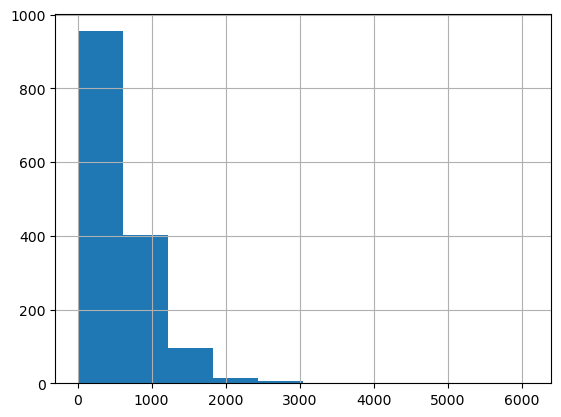

In [23]:
# Checking histogram
df['word_count_description'].hist()

In [24]:
# Checking median
df['word_count_description'].median()

480.0

In [25]:
# Decision: Replacing null values with median (distribution is quite skewed)
df['word_count_description'] = df['word_count_description'].fillna(df['word_count_description'].median())
df['word_count_description'] = df['word_count_description'].astype(int)

In [26]:
# Check (success)
df['word_count_description'].isna().sum()

0

## Checking for and handling duplicates

In [27]:
# check for duplicates total
df.duplicated().sum()

31

In [28]:
# check for dupicates per column
df.duplicated(subset=['title']).sum()

36

In [29]:
# check for dupicates per column
df.duplicated(subset=['founder']).sum()

79

In [30]:
# check for dupicates per column
df.duplicated(subset=['title']).sum()

36

In [31]:
# find and display duplicates
duplicates = df[df.duplicated(subset=['title'], keep=False)]

print(duplicates)

                                           title            founder  \
10                 1000 Hummingbirds Water Women  1000 Hummingbirds   
11                 1000 Hummingbirds Water Women  1000 Hummingbirds   
12                 1000 Hummingbirds Water Women  1000 Hummingbirds   
75    Agrosolar: Helping Myanmar's Small Farmers       Michael Papi   
76    Agrosolar: Helping Myanmar's Small Farmers       Michael Papi   
...                                          ...                ...   
1274                     Temple of Transformance     Michael Verdon   
1275                     Temple of Transformance     Michael Verdon   
1408                     Village Bicycle Project      Kimthol Yoeun   
1409                     Village Bicycle Project      Kimthol Yoeun   
1410                     Village Bicycle Project      Kimthol Yoeun   

                 location                                              topic  \
10             Santa Cruz                                      Huma

In [32]:
#drop duplicates in title column?
df.drop_duplicates(subset=['title'], inplace=True)

In [33]:
# doublecheck if duplicates dropped
duplicates = df[df.duplicated(subset=['title'], keep=False)]

print(duplicates)

Empty DataFrame
Columns: [title, founder, location, topic, year, currency, funding_goal, funding_goal_tipping_point, funding_goal_stretch_point, funding_raised, percentage_of_goal, percentage_of_goal_stretch, number_of_supporters, word_count_description]
Index: []


# Cleaning column

## Location

In [34]:
# Check for no. of unique values
df['location'].nunique()

898

In [35]:
# Check for no. of unique values (cont.)
df['location'].value_counts()

location
Sydney                      63
Melbourne                   47
Sydney, Australia           36
Melbourne, Australia        28
Australia                   22
                            ..
Keng Tung , Myanmar          1
Hyderabad                    1
Perth , Australia            1
Nkhata Bay, Malawi           1
Rabaul, Papua New Guinea     1
Name: count, Length: 898, dtype: int64

In [36]:
category_pattern = "United States"
similar_activities= set()
for value in df['location']:
    if type(value) == str and value != "United States" and re.search(category_pattern, value):
        similar_activities.add(value)
United_States = list(similar_activities)
United_States

['Los Angeles, United States',
 'Santa Barbara, CA, United States',
 "O'Fallon, United States",
 'Atlanta, United States',
 'Madison, United States',
 'Redding, Ca, United States',
 'Lynn Ma , United States',
 'Denver, United States',
 'Olympia, United States',
 'Hilo, Hawaii, United States',
 'Charlotte, United States Of America',
 'All cities in Colorado!, United States',
 'Detroit, United States',
 'Putney, Vermont, United States',
 'Portland, OR, United States',
 'Fort Lauderdale metro area, United States',
 'Durham, United States',
 'Jersey City, United States',
 'Lyle, Washington, United States',
 'Rumson, United States',
 'Lindsay, OK, United States',
 'Alexandria, VA, United States',
 'Richmond, United States',
 'Naples, Florida, 34114, United States',
 'Gloversville, NY and Wales, MA, United States',
 'United States, United States',
 'New Sharon, United States',
 'OAKLAND, United States',
 'Greenville, SC, United States',
 'Lakewood Ranch, FL, United States',
 'Mountain View, 

In [37]:
df['location'] = df['location'].apply(lambda x: 'United States' if x in United_States else x)
df['location']

0                                       United States
1       Maleny, Sunshine Coast, Queensland, Australia
2                                           Lancaster
3                                    Lindome , Sweden
4                                 Canberra, Australia
                            ...                      
1469                      Hebron, Palestine, State of
1470                                      Kansas City
1471                                           Sydney
1472                         Rabaul, Papua New Guinea
1473                                          Austria
Name: location, Length: 1438, dtype: object

df['location'].value_counts()

similar_activities

cities_to_countries = list(similar_activities)

country_mappings = dict(zip(cities_to_countries,[country.split(',')[-1] for country in cities_to_countries]))

clean_countries = [country.split(',')[-1] if country in cities_to_countries else country for country in df['location'] ]

clean_countries

df['location'] = clean_countries
df['location'].value_counts()

countries = ['Australia', 'Sweden', 'United Kingdom', 'Cambodia', 'Myanmar', 'Kenya', 'Bangladesh', ' Canada']

for i in countries:
    similar_activities= set()
    for value in df['location']:
        if type(value) == str and value != i and re.search(i, value):
            similar_activities.add(value)
    
    df['location'] = df['location'].apply(lambda x: i if x in similar_activities else x)
df['location']

country_mapping = {
    "Washington, DC", "Los Angeles", "Atlanta", "New York", "Austin", "Seattle", "Chicago", "San Diego", "Denver", "Boston", "Salt Lake City", "Cincinnati, OH", "San Francisco, CA", "San Francisco", "Indianapolis", "Baltimore", "Colorado Springs" :"United States",
    "Melbourne", "Sydney", "Brisbane", "Perth":"Australia",
    "London":"United Kingdom ",
    "Vancouver" : "Canada",
}
                                                                                                                                                                                                                                                                                                                                          3                                                                                                                                                                                                                                                                                                                                               3 
df['location']= list(map(lambda x:country_mapping.get(x,x),df['location']))

In [38]:
country_mapping = {
    "Washington, DC": "United States",
    "Los Angeles": "United States",
    "Atlanta": "United States",
    "New York": "United States",
    "Austin": "United States",
    "Seattle": "United States",
    "Chicago": "United States",
    "San Diego": "United States",
    "Denver": "United States",
    "Boston": "United States",
    "Salt Lake City": "United States",
    "Cincinnati, OH": "United States",
    "San Francisco, CA": "United States",
    "San Francisco": "United States",
    "Indianapolis": "United States",
    "Baltimore": "United States",
    "Colorado Springs": "United States",
    "Melbourne": "Australia",
    "Sydney": "Australia",
    "Brisbane": "Australia",
    "Perth": "Australia",
    "London": "United Kingdom",
    "Vancouver": "Canada",
    "Montreal, Canada": "Canada",
    "Budapest": "Hungary",
    "Powell River": "Canada",
    "Cambridge": "United Kingdom",
    "Great Plains, USA and Canada": "Canada",
    "Lake Country, British Columbia, Canada": "Canada",
    "Canada": "Canada",
    "Worldwide, Canada": "Canada",
    "Thunder Bay": "Canada",
    "Saint John": "Canada",
    "Verdun": "Canada",
    "wikwemikong": "Canada",
    "Truro": "Canada",
    "North Vancouver": "Canada",
    "TORONTO": "Canada",
    "St. John's": "Canada",
    "Vancouver": "Canada",
    "Sydney": "Australia",
    "Melbourne": "Australia",
    "Australia": "Australia",
    "United Kingdom": "United Kingdom",
    "Canada": "Canada",
    "Cambodia": "Cambodia",
    "Kenya": "Kenya",
    "Brisbane": "Australia",
    "London": "United Kingdom",
    "Washington, DC": "United States",
    "Myanmar": "Myanmar",
    "Phnom Penh": "Cambodia",
    "Los Angeles": "United States",
    "Unspecified": "Unspecified",
    "Adelaide": "Australia",
    "Atlanta": "United States",
    "Vancouver": "Canada",
    "New York": "United States",
    "Seattle": "United States",
    "Singapore": "Singapore",
    "Austin": "United States",
    "San Diego": "United States",
    "Chicago": "United States",
    "Sweden": "Sweden",
    "Canberra": "Australia",
    "Perth": "Australia",
    "Salt Lake City": "United States",
    "Toronto": "Canada",
    "Kampala": "Uganda",  # Update with the correct country
    "Nairobi": "Kenya",
    "Boston": "United States",
    "Oakland": "United States",
    "Colombo": "Sri Lanka",  # Update with the correct country
    "Denver": "United States",
    "Parramatta": "Australia",
    "Washington, D.C.": "United States",
    "Cincinnati, OH": "United States",
    "Kathmandu": "Nepal",  # Update with the correct country
    "Siem Reap": "Cambodia",
    "Addis Ababa": "Ethiopia",  # Update with the correct country
    "San Francisco, CA": "United States",
    "Lagos": "Nigeria",  # Update with the correct country
    "Bangladesh": "Bangladesh",
    "Indianapolis": "United States",
    "Ubud": "Indonesia",  # Update with the correct country
    "Houston": "United States",
    "India": "India",
    "Honolulu": "United States",
    "Mzuzu, Malawi": "Malawi",
    "Aurora": "United States",
    "Paris": "France",
    "Windsor": "Canada",
    "Berlin": "Germany",
    "Amsterdam, Netherlands": "Netherlands",
    "Brussels": "Belgium",
    "Dhaka": "Bangladesh",
    "Austria": "Austria",
    "Genova, Italy": "Italy",
    "Black Rock City, NV": "United States",
    "Boston, MA": "United States",
    "North Sulawesi, Indonesia": "Indonesia",
    "Albuquerque": "United States",
    "Columbus": "United States",
    "Miami": "United States",
    "Bangkok": "Thailand",
    "National": "Unknown",
    "Manila, Philippines": "Philippines",
    "Portland": "United States",
    "Dallas": "United States",
    "Hong Kong, Hong Kong": "Hong Kong",
    "Washington DC": "United States",
     "Hong Kong": "Hong Kong",
    "Italy": "Italy",
    "Thailand": "Thailand",
    "Bali, Indonesia": "Indonesia",
    "Lalitpur, Nepal": "Nepal",
    "Accra, Ghana": "Ghana",
    "Ithaca, NY": "United States",
    "Sacramento": "United States",
    "Tucson": "United States",
    "Cleburne, TX": "United States",
    "Santee": "United States",
    "Fremantle": "Australia",
    "Twinsburg": "United States",
    "India": "India",
    "Kinshasa/Goma/Bukavu/Uvira": "Democratic Republic of the Congo",
    "Netherlands": "Netherlands",
    "Fort Smith": "United States",
    "Bangladesh": "Bangladesh",
    "Austria": "Austria",
    "Monrovia": "Liberia",
    "San Jose": "United States",
    "France": "France",
    "Durban": "South Africa",
    "Brighton": "United Kingdom",
    "Gold Coast": "Australia",
    "Normandy Beach, NJ": "United States",
    "Dharamsala": "India",
    "India": "India",
    "Kampala, Uganda": "Uganda",
    "Netherlands": "Netherlands",
    "Bangladesh": "Bangladesh",
    "Milan, Italy": "Italy",
    "Liberia": "Liberia",
    "France": "France",
    "South Africa": "South Africa",
    "Lima, Peru": "Peru",
    "Pittsburgh": "United States",
    "Santa Cruz": "Unknown",  # Country information not provided
    "Cincinnati": "United States",
    "Democratic Republic of the Congo": "Democratic Republic of the Congo",
    "Sierra Nevada de Santa Marta, Colombia": "Colombia",
    "Malawi": "Malawi",
}



#df['location'] = df['location'].apply(lambda x: [country_mapping.get(item, item) for item in x] if isinstance(x, list) else country_mapping.get(x, x))

# df['location']= list(map(lambda x:country_mapping.get(x,x),df['location']))

df['location'] = df['location'].apply(lambda x: country_mapping.get(x, x))


In [39]:
    country_mapping_2 = {
    "Singapore, Singapore": "Singapore",
    "Peru": "Peru",
    "Bangladesh": "Bangladesh",
    "Beaverton": "United States",
    "Malawi": "Malawi",
    "Austria": "Austria",
    "Newcastle": "United Kingdom",
    "Kathmandu, Nepal": "Nepal",
    "Normandy Beach, NJ // Dharamsala": "United States",  # Assuming it's Normandy Beach, NJ
    "India": "India",
    "Liberia": "Liberia",
    "Lahore": "Pakistan",
    "Eagle Mountain": "United States",
    "Melbourne, VIC": "Australia",
    "Ponta Porã, Brazil": "Brazil",
    "Armidale": "Australia",
    "Palawan, Philippines": "Philippines",
    "Rio de Janeiro": "Brazil",
    "Aguilares": "Unknown",  # Country information not provided
    "Milton": "Canada",  # Country information not provided
    "Littleton": "United States",  # Co
    "Matipwili, Tanzania, United Republic of" : "Tanzania",
    "Sydney, Australia": "Australia",
    "Melbourne, Australia": "Australia",
    "Perth, Australia": "Australia",
    "Phnom Penh, Cambodia": "Cambodia",
    "Unspecified": "Unknown",
    "Adelaide, Australia": "Australia",
    "Brisbane, Australia": "Australia",
    "Melbourne": "Australia",
    "Canberra, Australia": "Australia",
}
        
    df['location'] = df['location'].apply(lambda x: country_mapping_2.get(x, x))

In [40]:
df['location'].unique()

array(['United States', 'Maleny, Sunshine Coast, Queensland, Australia',
       'Lancaster', 'Lindome , Sweden', 'Australia',
       'London, United Kingdom', 'Northampton, MA', 'Unknown',
       'Perth WA ', 'Bellingham, Washington',
       'Regional Victoria, Australia', 'Apartadó - Antioquia', 'Cambodia',
       'Gaithersburg', 'All, Virgin Islands, U.S.', 'Peru',
       'Macedon, Australia', 'Santa Rosa', 'Coolangatta, QLD, Australia',
       'Montanita', 'Glasgow', 'Bronx', 'Mercer Island', 'Canaan, Haiti',
       'United Kingdom', 'Banjul', 'Wales', 'Granada',
       'Central Point, OR', 'Byron Bay, NSW', 'Spring Lake', 'Ojai',
       'Sunshine Coast, Australia', 'Hue, Vietnam', 'Seville', 'Richmond',
       'Raleigh', 'Vancouver, Canada', 'Bogor', 'Columbia Station',
       'Fort Myers', 'Jeffersonville', 'Singapore', 'Medellín, Colombia',
       'Rombo, Kenya', 'Loliondo, Tanzania, United Republic of',
       'Meiktila, Myanmar', 'Neenah', 'Canada',
       'CIVITELLA PAGANICO, 

In [41]:
country_mapping_3 = {
'Maleny, Sunshine Coast, Queensland, Australia': 'Australia',
'Lancaster': 'United Kingdom',
'Lindome , Sweden': 'Sweden',
'Canberra, Australia': 'Australia',
'London, United Kingdom': 'United Kingdom',
'Northampton, MA': 'United States',
'Perth WA ': 'Australia',
'Bellingham, Washington': 'United States',
'Regional Victoria, Australia': 'Australia',
'Apartadó - Antioquia': 'Colombia',
'Cambodia': 'Cambodia',
'Gaithersburg': 'United States',
'Brisbane, Australia': 'Australia',
'All, Virgin Islands, U.S.': 'U.S.',
'Peru': 'Peru',
'Macedon, Australia': 'Australia',
'Santa Rosa': 'United States',
'Coolangatta, QLD, Australia': 'Australia',
'Montanita': 'Ecuador',
'Glasgow': 'United Kingdom',
'Bronx': 'United States',
'Mercer Island': 'United States',
'Canaan, Haiti': 'Haiti',
'Newcastle': 'United Kingdom',
'United Kingdom': 'United Kingdom',
'Sydney, Australia': 'Australia',
'Banjul': 'Gambia',
'Wales': 'United Kingdom',
'Granada': 'Spain',
'Central Point, OR': 'United States',
'Byron Bay, NSW': 'Australia',
'Spring Lake': 'United States',
'Ojai': 'United States',
'Sunshine Coast, Australia': 'Australia',
'Hue, Vietnam': 'Vietnam',
'Seville': 'Spain',
'Richmond': 'United States',
'Raleigh': 'United States',
'Vancouver, Canada': 'Canada',
'Bogor': 'Indonesia',
'Columbia Station': 'United States',
'Fort Myers': 'United States',
'Adelaide, Australia': 'Australia',
'Jeffersonville': 'United States',
'Singapore, Singapore': 'Singapore',
'Medellín, Colombia': 'Colombia',
'Rombo, Kenya': 'Kenya',
'Loliondo, Tanzania, United Republic of': 'Tanzania',
'Meiktila, Myanmar': 'Myanmar',
'Neenah': 'United States',
'CIVITELLA PAGANICO, Italy': 'Italy',
'Managua, Leon, Granada, Tisma, Nandasmo': 'Nicaragua',
'Budapest, Canada': 'Canada',
'Melbourne, Australia': 'Australia',
'GRAZ, VIENNA, WALDVIERTEL, AUSTRIA': 'Austria',
'Stanford ': 'United States',
'fayetteville ': 'United States',
'Bangor, Gwynedd, United Kingdom': 'United Kingdom',
'North Gosford': 'United Kingdom',
'Montreal': 'Canada',
'Singapore': 'Singapore',
'Central West NSW, Australia': 'Australia',
'Sipulan, Don Jose Aguirre, Zamboanga del Norte, Philippines': 'Philippines',
'Newport Beach': 'United States',
'Sunshine Coast': 'United States',
'Wollongong , Australia': 'Australia',
'Madison': 'United States',
'Kingsbridge': 'United Kingdom',
'Clinton, CT': 'United States',
'Farmingdale': 'United States',
'Black Rock City': 'United States',
'Albury, Australia': 'Australia',
'Katito, Kenya': 'Kenya',
'Port Elizabeth, South Africa': 'South Africa',
'Damak': 'Austria',
'Crested Butte': 'United States',
'Abuja': 'Nigeria',
'Embu, Kenya': 'Kenya',
"St. John's, Canada": 'Canada',
'Pembroke': 'Canada',
'Kolkata': 'India',
'California, MD': 'United States',
'Omaha': 'United States',
'Seattle / Tacoma Washington': 'United States',
'Charlotte': 'United States',
'Woodstock': 'Unknown',
'Atlanta, GA': 'United States',
'Beirut, Lebanon': 'Lebanon',
'Kampong Speu Province': 'Cambodia',
'DeRidder': 'United States',
'Melbourne ': 'Australia',
'Central Coast NSW, Australia': 'Australia',
'Birmingham, United Kingdom': 'United Kingdom',
'Woodbridge, United Kingdom': 'United Kingdom',
'Buffalo': 'United States',
'Cisarua, Indonesia': 'Indonesia',
'Lomé, Togo': 'Togo',
'Accra': 'Ghana',
'Orlando': 'United States',
'Chevy': 'United States',
'Tak': 'Thailand',
'San Pedro Sula ': 'Honduras',
'PUTTAPARTHY': 'Unknown',
'Dunsborough': 'Australia',
'Ottawa': 'Canada',
'Sunnyvale': 'United States',
'Byron Bay , Australia': 'Australia',
'Berkeley': 'United States',
'Cairns, Australia': 'Australia',
'Isle of Mull, United Kingdom': 'United Kingdom',
'Queensland , Australia': 'Australia',
'Campada Maria, Guinea-Bissau': 'Guinea-Bissau',
'Dover': 'United States',
'Hong Kong': 'China',
'Nairobi, Kenya': 'Kenya',
'Stockholm': 'Sweden',
'Court Sunrise': 'United States',
'Bendigo': 'Australia',
'Nation-wide, Senegal': 'Senegal',
'Saint John, Canada': 'Canada',
'San Francisco ': 'United States',
'SW Florida, USA': 'United States',
'Seaford': 'United Kingdom',
'Chirino, Dominican Republic': 'Dominican Republic',
'Sydney , Australia': 'Australia',
'Copenhagen, Denmark': 'Denmark',
'Runchet, Nepal': 'Nepal',
'Dhaka, Bangladesh': 'Bangladesh',
'Kumba, South West Region': 'Cameroon',
'Moshi, Tanzania, United Republic of': 'Tanzania',
'Perth, Australia': 'Australia',
'Des Moines, Iowa': 'United States',
'Kampot/Melbourne': 'Australia',
'Phnom Penh, Cambodia': 'Cambodia',
'Ywangan Township, Myanmar': 'Myanmar',
'Bristol': 'United Kingdom',
'North vancouver, Canada': 'Canada',
'Tampa': 'United States',
'Siem Reap, Cambodia': 'Cambodia',
'La Laguna de Apoyo, Nicaragua': 'Nicaragua',
'Kuching, Malaysia': 'Malaysia',
'Pescadero': 'United States',
'MUMIAS': 'Kenya',
'Australia, Australia': 'Australia',
'Calbayog City, Philippines': 'Philippines',
'Melbourne, Sydney, Global': 'Australia',
'Northwest, China': 'China',
'Kuala Lumpur, Malaysia': 'Malaysia',
'Yangon, Myanmar': 'Myanmar',
'Parramatta, Australia': 'Australia',
'Brisbane , Australia': 'Australia',
'Fremantle, Australia': 'Australia',
'Melbourne , Australia': 'Australia',
'Victoria, Australia': 'Australia',
'Darwin, Australia': 'Australia',
'St Albans, United Kingdom': 'United Kingdom',
'Little Bassa, Liberia': 'Liberia',
'Kurdistan, Iraq': 'Iraq',
'Suamico, WI': 'United States',
'Nador, Morocco': 'Marocco',
'PERTH, Australia': 'Australia',
'Jakmel and surrounding areas, Haiti': 'Haiti',
'Sululta': 'Ethiopia',
'Timisoara': 'Romania',
'Freetown, Sierra Leone': 'Sierra Leone',
'Palu, Indonesia': 'Indonesia',
'Springfield (Montco) PA': 'United States',
'Kerandangan , Indonesia': 'Indonesia',
'Melbourne, Sydney, Adelaide': 'Australia',
'Freetown': 'Sierra Leone',
'George, South Africa': 'South Africa',
'Aguilares': 'El Salvador',
'Antigua': 'United Kingdom',
'Vashon': 'United States',
'Allentown PA': 'United States',
'Santa Cruz Cuautomatitla, Mexico': 'Mexico',
'KwaZulu Natal, South Africa': 'South Africa',
'Lhokseumawe, Indonesia': 'Indonesia',
'Bulawayo': 'Zimbabwe',
'Twontay Township, Myanmar': 'Myanmar',
'LONDON - BARCELONA, Spain': 'Spain',
'Kantchari, Burkina Faso': 'Burkina Faso',
'Hartford': 'Australia',
'Melbourne, Sydney, Adelaide , Australia': 'Australia',
'Sonega': 'Australia',
'Oakland, CA': 'United States',
'Tamworth': 'United Kingdom',
'Cambridge, Canada': 'Canada',
'Rochester, NY': 'United States',
'Norwood': 'United States',
'Yingpan village': 'United States',
'Bucharest, Romania': 'Romania',
'Desa Repi': 'Indonesia',
'Cotonou, Benin': 'Benin',
'Antigua':'Spain',
'BUNDABERG': 'Australia',
'Aguilares': 'El Salvador',
'Norwich':'United Kingdom',
'Cleveland OH': 'United States',
'Homa Bay, Kenya': 'Kenya',
'Port-de-Paix, Haiti': 'Haiti',
'Boulder': 'United States',
'Peoria': 'United States',
'Hong Kong': 'China',
'Naga Valadia, Kutch, Gujarat, India': 'India',
'Gosford': 'United States',
'Picton, Australia': 'Australia',
'Littleton, CO': 'United Kingdom',
'Tanunda': 'Australia',
'newport, United Kingdom': 'United Kingdom',
'Monrovia-Tubmanburg, Liberia': 'Liberia',
'Bandung, Jawa Barat': 'Indonesia',
'Jinja, Uganda': 'Uganda',
'Oak Park': 'United States',
'Hong Kong': 'China',
'Mzuzu &amp; Nkhotakota, Malawi': 'Malawi',
'Melbourne - the outer norther suburbs!': 'Australia',
}

df['location'] = df['location'].apply(lambda x: country_mapping_3.get(x, x))

In [42]:
df['location'].nunique()

521

In [43]:
country_mapping_4 = {
    'Frankston': 'Australia',
    'Las Lagunas': 'Unknown',
    'Des Moines Iowa': 'United States',
    'Nangi Village, Nepal': 'Nepal',
    'Philadelphia': 'United States',
    'Tampaksiring, Bali, Australia': 'Australia',
    'Falls Church': 'United States',
    'Raja County, Golok Prefecture, Eastern Tibet': 'Tibet',
    'New York, NY': 'United States',
    'Kumasi, Ghana': 'Ghana',
    'Adoor, Kerala and beyond, India': 'India',
    'St. Louis': 'United States',
    'Sisaket, Thailand': 'Thailand',
    'St. Paul': 'United States',
    'Savage, Minnesota': 'United States',
    'TORONTO, Canada': 'Canada',
    'Parramatta and Greater Western Sydney, Australia': 'Australia',
    'Aurora Community': 'United States',
    'gold coast': 'United States',
    'EUMUNDI, Australia': 'Australia',
    'Cusco Department, Peru': 'Peru',
    'Port Jefferson': 'United States',
    'Fremantle, Australia': 'Australia',
    'Biratnagar, Nepal': 'Nepal',
    'Whitefish': 'United States',
    'Choote Danda, Nepal': 'Nepal',
    'Darwin': 'Australia',
    'Brisbane , Australia': 'Australia',
    'New Hartford/Winsted': 'United States',
    'Tulsa': 'United States',
    'Chinsurah, Hooghly, India': 'India',
    'Denver and Ithaca': 'United States',
    'Bamenda': 'United States',
    'Austin, Texas': 'United States',
    'Kpalimé - Kloto, Togo': 'Togo',
    'Ngo, Nigeria': 'Nigeria',
    'Broolyn': 'United States',
    'Athens': 'Greece',
    'Jerusalem, Israel': 'Israel',
    'Salvador': 'El Salvador',
    'Idaho Falls': 'United States',
    'Melbourne, Australia, Australia': 'Australia',
    'Corvallis ': 'United States',
    'Multiple cities in Rwanda where bananas are grown': 'Rwanda',
    'Port Vila, Vanuatu': 'Vanuatu',
    'Bahrain, Bahrain': 'Bahrain',
    'Rwamagana, Rwanda': 'Rwanda',
    'Pomfret Center, Connecticut': 'United States',
    'Saint Lucia': 'United States',
    'Port Au Prince': 'United States',
    'San Miguel de Allende': 'Venezuela',
    'Zanzibar, Muungoni, Tanzania, United Republic of': 'Tanzania',
    'Memphis': 'United States',
    'London / Accra': 'United Kingdom/Ghana',
    'Mission Viejo': 'United States',
    'Rayong': 'Thailand',
    'South Portland': 'United States',
    'Rusk': 'United States',
    'Danlí, Honduras': 'Honduras',
    'Caracas, Venezuela, Bolivarian Republic of': 'Venezuela',
    'Tampa, FL': 'United States',
    'Brighton, United Kingdom': 'United Kingdom',
    'Nassau, Bahamas': 'Bahamas',
    'Flushing': 'United States',
    'Very small communities in Sierra Gorda, Querétaro, Mexico': 'Mexico',
    'Victoria, Australia': 'Australia',
    'Birmingham': 'United Kingdom',
    'Medellin': 'United States',
    'Los Angeles, California': 'United States',
    'Cham': 'United States',
    'Dunmore': 'United States',
    'Melbourne , Australia': 'Australia',
    'Saratoga Springs': 'United States',
    'Parramatta, Sydney, Australia': 'Australia',
    'Guguletu, Cape Town, South Africa': 'South Africa',
    'Tlaxcala': 'Unknown',
    'Manila ': 'Philippines',
    'Antioch': 'Unknown',
    'Rwamwanja, Uganda': 'Uganda',
    'Petach Tikva, Israel': 'Israel',
    'Cherkassy': 'Unknown',
    'Gold Coast, Australia': 'Australia',
    'Fremantle, Western Australia, Australia': 'Australia',
    'Winter Springs': 'United States',
    'Santa Barbara ': 'United States',
    'Kampong Speu, Cambodia': 'Cambodia',
    'Florianópolis, Brazil': 'Brazil',
    'Ljungskile, Sweden': 'Sweden',
    'Shanghai': 'China',
    'Washington, DC, USA': 'United States',
    'Australia Wide, Australia': 'Australia',
    'Istanbul': 'Turkey',
    'Amherst': 'Netherlands',
    'Springfield, IL': 'United States',
    'St. Louis, Missouri': 'United States',
    'Houston, TX': 'United States',
    'sagar, India': 'India',
    'Sydney, Melbourne, Adelaide': 'Australia',
    'Ngoma, Rwanda': 'Rwanda',
    'Minembwe, Congo': 'Congo',
    'Dong Xuan district, Phu Yen province, Vietnam': 'Vietnam',
    'Tacoma': 'United States',
    'Johannesburg, South Africa, Zambia': 'South Africa',
    'Eaglehawk': 'Australia',
    'Allentown': 'United States',
    'Keng Tung , Myanmar': 'Myanmar',
    'Hyderabad': 'India',
    'Perth , Australia': 'Australia',
    'Nkhata Bay, Malawi': 'Malawi',
    'Shanghai , China': 'China',
    'Paramatta, Australia': 'Australia',
    'Saint Louis': 'United States',
    'Enmore': 'Unknown',
    'Bondi, Australia': 'Australia',
    'New Orleans': 'United States',
    'Guidowel': 'Unknown',
    'Adelaide, South Australia, Australia': 'Australia',
    'various': 'Unknown',
    'Serra Grande, Brazil': 'Brazil',
    'Harvard, Illinois': 'United States',
    'MELBOURNE': 'Australia',
    'YUS Conservation Area': 'United States',
    'Poughkeepsie': 'United States',
    'Managua': 'Nicaragua',
    'Stockholm, Sweden': 'Sweden',
    'West Hartford': 'United States',
    'Northcote': 'United States',
    'NY NY': 'United States',
    'Brisbane ': 'Australia',
    'Boston, MA, USA': 'United States',
    'Johns River, Australia': 'Australia',
    'Alvarado': 'United States',
    'Long':'United States',
    'Lviv, Ukraine':'Ukraine',
    'Bekasi, West Java, Indonesia':'Indonesia',
    'North of Chiapas': 'United States',
    'Mpamantha, Nkotakota, Malawi':'Malawi',
    'Norwell': 'United States',
    'Buenos Aires, Argentina':'Argentina',
    'Breinigsville': 'United States',
    'Silver Spring': 'United States',
    'Davao, Philippines':'Phillipines',
    'Melbourne - the outer norther suburbs!':'Australia',
    'Punta Gorda, Belize':'Belize',
    'Phillipines':'Phillipines',
    'San Salvador, EL Salvador':'EL Salvador',
    'Kisumu, Kenya':'Kenya',
    'Miami, FL':'United States',
    'Coventry':'United Kingdom',
    'Ngorongoro Conservation Area, Tanzania, United Republic of':'Tanzania',
    'Ghent':'Belgium',
    'Hinesburg':'United States',
    'Soweto, South Africa':'South Africa',
    'Hunter Valley':'Australia',
    'Kolkata and Central India, India': 'India',
    'Oakland, CA': 'Canada',
    'Arnhem Land':'Australia',
    'Manila': 'Phillipines',
    'Denver, CO': 'United States',
}

df['location'] = df['location'].apply(lambda x: country_mapping_4.get(x, x))

In [44]:
country_mapping_5 = {
 'Unknown': 'Unknown',
 'Colombia': 'Colombia',
 'Cambodia': 'Cambodia',
 'United States': 'United States',
 'Peru': 'Peru',
 'Ecuador': 'Ecuador',
 'Haiti': 'Haiti',
 'Gambia': 'Gambia',
 'Spain': 'Spain',
 'Vietnam': 'Vietnam',
 'Canada': 'Canada',
 'Indonesia': 'Indonesia',
 'Singapore': 'Singapore',
 'Kenya': 'Kenya',
 'Tanzania': 'Tanzania',
 'Myanmar': 'Myanmar',
 'Italy': 'Italy',
 'Nicaragua': 'Nicaragua',
 'Austria': 'Austria',
 'Nepal': 'Nepal',
 'Philippines': 'Philippines',
 'India': 'India',
 'South Africa': 'South Africa',
 'Netherlands': 'Netherlands',
 'Nigeria': 'Nigeria',
 'Panama': 'Panama',
 'Ghana': 'Ghana',
 'Lebanon': 'Lebanon',
 'Belgium': 'Belgium',
 'Togo': 'Togo',
 'Thailand': 'Thailand',
 'Honduras': 'Honduras',
 'Uganda': 'Uganda',
 'Guinea-Bissau': 'Guinea-Bissau',
 'China': 'China',
 'Senegal': 'Senegal',
 'Dominican Republic': 'Dominican Republic',
 'Denmark': 'Denmark',
 'Bangladesh': 'Bangladesh',
 'Cameroon': 'Cameroon',
 'Sri Lanka': 'Sri Lanka',
 'Madagascar': 'Madagascar',
 'Malaysia': 'Malaysia',
 'Frankston': 'Unknown',
 'Tibet': 'Tibet',
 'Democratic Republic of the Congo': 'Democratic Republic of the Congo',
 'Greece': 'Greece',
 'Israel': 'Israel',
 'El Salvador': 'El Salvador',
 'Rwanda': 'Rwanda',
 'Vanuatu': 'Vanuatu',
 'Bahrain': 'Bahrain',
 'Venezuela': 'Venezuela',
 'Malawi': 'Malawi',
 'United Kingdom/Ghana': 'United Kingdom/Ghana',
 'Bahamas': 'Bahamas',
 'Mexico': 'Mexico',
 'Brazil': 'Brazil',
 'Turkey': 'Turkey',
 'Congo': 'Congo',
 'Longmont': 'Longmont',
 'Medellín and others': 'Medellín and others',
 'Kalkaringi, Australia': 'Australia',
 'Beloit': 'Beloit',
 'El Paredon': 'El Paredon',
 'Kasoa, Ghana': 'Ghana',
 'Niger Delta Region, Nigeria': 'Nigeria',
 'Mindoro Island, Philippines': 'Philippines',
 'Aquin, Haiti': 'Haiti',
 'Verdun, Canada': 'Canada',
 'Siteki, Swaziland': 'Swaziland',
 'Gorkha District, Nepal': 'Nepal',
 'Exeter': 'Exeter',
 'Liberia': 'Liberia',
 'Williamsport, PA': 'United States',
 'Battambang': 'Battambang',
 'Deerfield Beach': 'Deerfield Beach',
 'Capelle Aan Den IJssel, Netherlands': 'Netherlands',
 'Pokhara, Nepal': 'Nepal',
 'Kharagpur': 'Kharagpur',
 'Oshkosh': 'Oshkosh',
 'Cochabamba, Bolivia': 'Bolivia',
 'Faisalabad, Pakistan': 'Pakistan',
 'Tel Aviv': 'Israel',
 'Jakarta, Bogor, Indonesia': 'Indonesia',
 'Puncak, Indonesia': 'Indonesia',
 'Gusau': 'Gusau',
 'Pomona': 'Pomona',
 'Mbarara, Uganda': 'Uganda',
 'New Orleans, LA': 'United States',
 'Cedar Knolls, NJ': 'United States',
 'Islands of Vanua Levu and Taveuni': 'Unknown',
 'Margaret River': 'Australia',
 'Nobby, QLD, Australia': 'Australia',
 'New York, New York': 'United States',
 'Jogja': 'Indonesia',
 'Delmenhorst, Germany': 'Germany',
 'Stanford, USA': 'United States',
 'Ann Arbor': 'United States',
 'Antwerp': 'Belgium',
 'Mbita': 'Kenya',
 'Dar es Salaam': 'Tanzania',
 'Ijok, Kuala Selangor': 'Malaysia',
 'Sunnyvale, CA': 'United States',
 'Chiang Rai, Thailand': 'Thailand',
 'Nashville TN': 'United States',
 'Fort Dodge': 'United States',
 'Nampa, Idaho': 'United States',
 'Chateaubelair, Saint Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
 'Novato': 'United States',
 'Palm Island , Australia': 'Australia',
 'Kilimanjaro, Tanzania, United Republic of': 'Tanzania',
 'Canton': 'United States',
 'Kavango region, Namibia': 'Namibia',
 'Benbrook, Texas': 'United States',
 'Newfane': 'United States',
 'Hokkaido , Japan': 'Japan',
 'Cape Town': 'South Africa',
 'Ioannina, Greece': 'Greece',
 'Almaty, Kazakhstan': 'Kazakhstan',
 'Binh Duong, Vietnam': 'Vietnam',
 'Caiman, Haiti': 'Haiti',
 'Detroit': 'United States',
 'larache, Morocco': 'Morocco',
 'Győr, Hungary': 'Hungary',
 'Ometepe , Nicaragua': 'Nicaragua',
 'Recife, Brazil': 'Brazil',
 'Leiden, Netherlands': 'Netherlands',
 'Byron Bay, Australia': 'Australia',
 'Argentina': 'Argentina',
 'NSW, Australia': 'Australia',
 "D'kar, Botswana": 'Botswana',
 'Kampot, Cambodia': 'Cambodia',
 'Liverpool': 'United Kingdom',
 'Indianapolis, Indiana': 'United States',
 'Lake Country, British Columbia, Canada': 'Canada',
 'Gothenburg, Sweden': 'Sweden',
 'Karachi, Pakistan': 'Pakistan',
 'Weston': 'United States',
 'Northport': 'United States',
 'Fraser Island': 'Australia',
 'Janwar, India': 'India',
 'Salem, VA': 'United States',
 'LeVeque, Haiti': 'Haiti',
 'Birsbane': 'United States',
 'Lubuk Linggau, Indonesia': 'Indonesia',
 'Kathmandu and Nuwakot and Rasuwa District, Nepal': 'Nepal',
 'Bali': 'Indonesia',
 'Christchurch, United Kingdom': 'United Kingdom',
 'Christchurch, New Zealand': 'New Zealand',
 'Central Coast': 'Australia',
 'Royal Oak, Michigan': 'United States',
 'Heidelberg, Germany': 'Germany',
 'Kangaroo Island, Australia': 'Australia',
 'Powell River, Canada': 'Canada',
 'Padua': 'Unknown',
 'Cologne, Germany': 'Germany',
 'Townsville, Australia': 'Australia',
 'Naryn, Kyrgyzstan': 'Kyrgyzstan',
 'Kigali': 'Rwanda',
 'City of Parramatta, Australia': 'Australia',
 'boston': 'United States',
 'Gainesville': 'United States',
 'Global': 'Unknown',
 'Warner Robins': 'United States',
 'Providence, RI': 'United States',
 'Greater Minneapolis, and Southern MN': 'United States',
 'Copenhagen': 'Denmark',
 'Annapolis': 'United States',
 'Berkley': 'Unknown',
 'Framingham, Massaschusetts': 'United States',
 'Punta Gorda': 'United States',
 'Louisville': 'United States',
 'Nicosia': 'Cyprus',
 'Tortona AL': 'Italy',
 'Melbourne | Sydney': 'Australia',
 'Brisbane + Sydney': 'Australia',
 'OLBIA': 'Australia',
 'rural India': 'India',
 'Brisbane, QLD': 'Australia',
 'Kumassi': 'Ghana',
 'Wollongong, Australia': 'Australia',
 'Orange': 'United States',
 'Berkshire County': 'United Kingdom',
 'Lilongwe': 'Malawi',
 'South East Queensland, Australia': 'Australia',
 'Winter Haven': 'United States',
 'Findhorn, United Kingdom': 'United Kingdom',
 'Linz, Austria': 'Austria',
 'Germany': 'Germany',
 'Upper Northfield': 'United Kingdom',
 'Mumbai, India': 'India',
 'Yajalon Region, Chiapas, Mexico': 'Mexico',
 'Palo Alto': 'United States',
 'Granbury': 'United States',
 'Aliab Villages, Lakes State': 'South Sudan',
 'wikwemikong, Canada': 'Canada',
 'North Dublin, Ireland': 'Ireland',
 'Truro, Canada': 'Canada',
 'Apaah': 'Unknown',
 'Berkeley, CA': 'United States',
 'Atiak': 'Uganda',
 'Grove City': 'United States',
 'France': 'France',
 'Central Coast NSW': 'Australia',
 'Ouagadougou': 'Burkina Faso',
 'Dumaguete': 'Philippines',
 'Alice Springs': 'Australia',
 'Kilifi, Kenya': 'Kenya',
 'Oaxaca, Mexico': 'Mexico',
 'Gothenburg, Sweden': 'Sweden',
 'Gold Coast': 'Australia',
 'New York City': 'United States',
 'Saltsburg': 'United States',
 'Felipe Carrillo Puerto': 'Mexico',
 'Cardiff, United Kingdom': 'United Kingdom',
 'Incline Village and Reno, Nevada': 'United States',
 'Bommiyarpalayam, Tamil Nadu': 'India',
 'Ypsilanti': 'United States',
 'Bistol, United Kingdom': 'United Kingdom',
 'Chateaubelair, Saint Vincent And The Grenedines': 'Saint Vincent and the Grenadines',
 'Thunder Bay, Canada': 'Canada',
 'Springdale': 'United States',
 'Bangkok': 'Thailand',
 'Glen Burnie': 'United States',
 'Orrville': 'United States',
 'Des Moines': 'United States',
 'Springfield': 'United States',
 'Moin': 'Costa Rica',
 'Parksville': 'Canada',
 'Brievengat': 'Curaçao',
 'Port-au-Prince, Haiti': 'Haiti',
 'Agra, India': 'India',
 'Melbourne - the outer norther suburbs!': 'Australia',
 'Melbourne - the outer norther suburbs! ': 'Australia',
 'Palangka Raya': 'Indonesia',
 'Kampot': 'Cambodia',
 'Pakistan': 'Pakistan',
 'Hong Kong': 'Hong Kong',
 'Aguilares': 'El Salvador',
 'Ethiopia': 'Ethiopia',
 'Burkina Faso': 'Burkina Faso',
 'Zimbabwe': 'Zimbabwe',
 'Antigua': 'Antigua and Barbuda',
 'Marocco': 'Morocco',
 'Iraq': 'Iraq',
 'Romania': 'Romania',
 'Sierra Leone': 'Sierra Leone',
 'Benin': 'Benin',
 'Aliso Viejo': 'United States',
 'Anantapur, India': 'India',
 'Ho Chi Minh City, Vietnam': 'Vietnam',
 'Gloucester': 'United Kingdom',
 'Port Melbourne , Australia': 'Australia',
 'Charleston': 'United States',
 'San Antonio, TX': 'United States',
 'Kuserua, Rio Pastaza, Ecuador': 'Ecuador',
 'Pucallpa': 'Peru',
 'Kuala Lumpur': 'Malaysia',
 'Nonspecific': 'Unknown',
 'Baku, Azerbaijan': 'Azerbaijan',
 'Abingdon': 'United Kingdom',
 'Toowoomba & South East Queensland, Australia': 'Australia',
 'Magadi-Kenya, Kenya': 'Kenya',
 'Wichita': 'United States',
 'Sydney, NSW': 'Australia',
 'New Haven': 'United States',
 'EL Salvador': 'El Salvador',
 'Yeadon': 'United Kingdom',
 'São Paulo': 'Brazil',
 'Gaza': 'Palestine',
 'Belize': 'Belize',
 'Ukraine': 'Ukraine',
 'Phillipines': 'Philippines',
 'Fiji': 'Fiji',
 'Lilongwe, Malawi': 'Malawi',
 'Seattle, WA': 'United States',
 'Port Moresby and all around PNG, Papua New Guinea': 'Papua New Guinea',
 'Bali': 'Indonesia',
 'Byron Bay': 'Australia',
 'Preševo, Serbia': 'Serbia',
 'Calais , France': 'France',
 'BLANDFORD': 'United Kingdom',
 'Kyiv, Ukraine': 'Ukraine',
 'countryside, Toliara region, Madagascar': 'Madagascar',
 'Guatemala': 'Guatemala',
 'Dexter': 'United States',
 'Yallingup, Australia': 'Australia',
 'Wuhan, China': 'China',
 'Manly NSW, Australia': 'Australia',
 'Kittery, Maine': 'United States',
 'Jamnya, India': 'India',
 'Toowoomba': 'Australia',
 'Oakland, CA': 'United States',
 'Rock Valley': 'Australia',
 'Nkob, Zagora Province, Morocco': 'Morocco',
 'Northern Thailand': 'Thailand',
 'Kep, Cambodia': 'Cambodia',
 'Fairfax': 'United States',
 'Tsavo-West-Nationalpark, Kenya': 'Kenya',
 'Port Kembla': 'Australia',
 'Loveland, CO, united states': 'United States',
 'Chiang Mai': 'Thailand',
 'Davenport': 'United States',
 'Europe, Belgium': 'Belgium',
 'Adealide, Australia': 'Australia',
 'Kitchener Waterloo': 'Canada',
 'Atami': 'Japan',
 'Shoalhaven NSW, Australia': 'Australia',
 'Charlottesville': 'United States',
 'Komenda, Ghana': 'Ghana',
 'Delaware': 'United States',
 'Palm Bay/Melbourne Florida': 'United States',
 'Ocotal': 'Nicaragua',
 'Atlanta, India': 'India',
 'Hobart, Australia': 'Australia',
 'Woodstock': 'Canada',
 'Dallas/Fort Worth': 'United States',
 'Burringbar': 'Australia',
 'Chicago, IL': 'United States',
 'Sofía, Belgrade, Thessaloniki, Padova, Lampedusa, Bulgaria': 'Bulgaria',
 'Woolgoolga, Australia': 'Australia',
 'Port Saint Lucie': 'United States',
 'Telluride, CO, United states': 'United States',
 'Castro Valley': 'United States',
 'Red Deer Alberta': 'Canada',
 'Shuswap/Secwepemc': 'Canada',
 'Chiang Mai, Thailand': 'Thailand',
 '0000': 'Unknown',
 'Blacksburg, Virginia': 'United States',
 'Little Rock, Arkansas': 'United States',
 'Senigallia': 'Italy',
 'Syndey': 'Unknown',
 'Berryville': 'United States',
 'York': 'United Kingdom',
 'Kaysville': 'United States',
 'Myeik, Myanmar': 'Myanmar',
 'Layton, Utah': 'United States',
 'Denpasar': 'Indonesia',
 'Ngong, Mombasa, Kenya': 'Kenya',
 'Hermanus': 'South Africa',
 'Martina Franca': 'Italy',
 'Perth, Australia, Australia': 'Australia',
 'San Francisco, South Africa': 'South Africa',
 'Cartagena, Colombia': 'Colombia',
 'Geraldton': 'Australia',
 'Cherkasy': 'Ukraine',
 'Buenos Aires': 'Argentina',
 'Berlin, Germany': 'Germany',
 'Parramatta, Australia, australia': 'Australia',
 'Harrow-on-the-Hill': 'United Kingdom',
 'Stockholm, sweden': 'Sweden',
 'Lyon': 'France',
 'Tortola, Virgin Islands, British': 'British Virgin Islands',
 'Crediton': 'United Kingdom',
 'Columbia, SC': 'United States',
 'Porto': 'Portugal',
 'Stavanger': 'Norway',
 'Baguia, Timor-Leste': 'Timor-Leste',
 'Nakuru, Kenya': 'Kenya',
 'Saint Paul': 'United States',
 'Montréal': 'Canada',
 'Chermaitre, Haiti': 'Haiti',
 'Springville': 'United States',
 'Neyyar Dam, India': 'India',
 'Blackheath': 'Australia',
 'Campeche, Mexico': 'Mexico',
 'Bosomtwe District / Ashanti Region near Kumasi, Ghana': 'Ghana',
 'Perth': 'Australia',
 'Morphett Vale': 'Australia',
 'Mpigi, Uganda': 'Uganda',
 'Bronx, NY': 'United States',
 'Ashland, Oregon': 'United States',
 'Accra, Kumasi, Ghana': 'Ghana',
 'Rishikesh': 'India',
 'DC, MD, VA areas': 'United States',
 'Pune': 'India',
 'Zürich, Switzerland': 'Switzerland',
 'Leederville, Western Australia, Australia': 'Australia',
 'Queens': 'United States',
 'Hebron, Palestine, State of': 'Palestine',
 'Kansas City': 'United States',
 'United Kingdom/Ghana': 'Ghana',
 'Longmont': 'United States', 
 'Medellín and others': 'Colombia', 
 'Beloit': 'United States',
 'El Paredon': 'Guatemala',  
 'Exeter': 'United States',
 'Battambang': 'Cambodia',
 'Deerfield Beach': 'United States', 
 'Kharagpur': 'India', 
 'Oshkosh': 'India',
 'Gusau': 'India',
 'Pomona': 'United States', 
 'Islands of Vanua Levu and Taveuni ': 'Fiji',   
 'U.K.': 'United Kingdom', 
 'Lake Country, British Columbia, Canada, Canada': 'Canada',
 'Gothenburg, Sweden, Sweden': 'Sweden', 
 'Bali ': 'Indonesia',  
 'Cyprus': 'Greece', 
 'Gold Coast ': 'United States', 
 'Bangkok ': 'Thailand', 
 'Curaçao': 'United States',
 'Hong Kong ': 'China',
 'Aguilares ':'El Salvador',
 'Antigua ': 'Antigua', 
 'Toowoomba &amp; South East Queensland, Australia': 'Australia', 
 'Palestine': 'Israel',
 'Oakland, CA ': 'Canada',
 'Woodstock ': 'United States', 
 'British Virgin Islands': 'United Kingdom', 
 'Crediton ': 'United Kingdom', 
 'Perth ': 'Australia', 
 'Rabaul, Papua New Guinea': 'Papua New Guinea',
 'U.S.':'United States',
 'Frankston ':'Australia',
}

df['location'] = df['location'].apply(lambda x: country_mapping_5.get(x, x))

In [45]:
df['location'].value_counts().head(60)

location
United States                       490
Australia                           389
United Kingdom                       64
Canada                               43
Cambodia                             34
Unknown                              29
Indonesia                            25
India                                23
Kenya                                22
Nepal                                14
South Africa                         11
Thailand                             11
Ghana                                11
Uganda                               11
Myanmar                              10
Philippines                          10
Italy                                 9
Haiti                                 9
China                                 8
Singapore                             8
Malawi                                7
Colombia                              7
Germany                               7
Tanzania                              7
Sweden                         

In [46]:
df['location'].unique()

array(['United States', 'Australia', 'United Kingdom', 'Sweden',
       'Unknown', 'Colombia', 'Cambodia', 'Peru', 'Ecuador', 'Haiti',
       'Gambia', 'Spain', 'Vietnam', 'Canada', 'Indonesia', 'Singapore',
       'Kenya', 'Tanzania', 'Myanmar', 'Italy', 'Nicaragua', 'Austria',
       'Nepal', 'Philippines', 'India', 'South Africa', 'Netherlands',
       'Nigeria', 'Panama', 'Ghana', 'Lebanon', 'Belgium', 'Togo',
       'Thailand', 'Honduras', 'Uganda', 'Guinea-Bissau', 'China',
       'Senegal', 'Dominican Republic', 'Denmark', 'Bangladesh',
       'Cameroon', 'Sri Lanka', 'Madagascar', 'Malaysia', 'Tibet',
       'Democratic Republic of the Congo', 'Greece', 'Israel',
       'El Salvador', 'Rwanda', 'Vanuatu', 'Bahrain', 'Venezuela',
       'Malawi', 'Bahamas', 'Mexico', 'Brazil', 'Turkey', 'Congo',
       'Guatemala', 'Swaziland', 'Liberia', 'Bolivia', 'Pakistan', 'Fiji',
       'Germany', 'Saint Vincent and the Grenadines', 'Namibia', 'Japan',
       'Kazakhstan', 'Morocco', 'Hung

cities = ['Unknown', 'Colombia', 'Cambodia', 'U.S.', 'Peru', 'Ecuador',
       'Haiti', 'Gambia', 'Spain', 'Vietnam', 'Canada', 'Indonesia',
       'Singapore', 'Kenya', 'Tanzania', 'Myanmar', 'Italy', 'Nicaragua',
       'Austria', 'Nepal', 'Philippines', 'India', 'South Africa',
       'Netherlands', 'Nigeria', 'Panama', 'Ghana', 'Lebanon', 'Belgium',
       'Togo', 'Thailand', 'Honduras', 'Uganda', 'Guinea-Bissau', 'China',
       'Senegal', 'Dominican Republic', 'Denmark', 'Bangladesh',
       'Cameroon', 'Sri Lanka', 'Madagascar', 'Malaysia', 'Frankston ',
       'Tibet', 'Democratic Republic of the Congo', 'Greece', 'Israel',
       'El Salvador', 'Rwanda', 'Vanuatu', 'Bahrain', 'Venezuela',
       'Malawi', 'United Kingdom/Ghana', 'Bahamas', 'Mexico', 'Brazil',
       'Turkey', 'Congo', 'Longmont', 'Medellín and others',
       'Kalkaringi, Australia', 'Beloit', 'El Paredon', 'Kasoa, Ghana',
       'Niger Delta Region, Nigeria', 'Mindoro Island, Philippines',
       'Aquin, Haiti', 'Verdun, Canada', 'Siteki, Swaziland',
       'Gorkha District, Nepal', 'Exeter', 'Liberia', 'Williamsport, PA',
       'Battambang', 'Deerfield Beach',
       'Capelle Aan Den IJssel, Netherlands', 'Pokhara, Nepal',
       'Kharagpur', 'Oshkosh', 'Cochabamba, Bolivia',
       'Faisalabad, Pakistan', 'Tel Aviv', 'Jakarta, Bogor, Indonesia',
       'Puncak, Indonesia', 'Gusau', 'Pomona', 'Mbarara, Uganda',
       'New Orleans, LA', 'Cedar Knolls, NJ',
       'Islands of Vanua Levu and Taveuni ', 'Margaret River',
       'Nobby, QLD, Australia', 'New York, New York', 'Jogja',
       'Delmenhorst, Germany', 'Stanford, USA', 'Ann Arbor', 'Antwerp',
       'Mbita', 'Dar es Salaam', 'Ijok, Kuala Selangor', 'Sunnyvale, CA',
       'Chiang Rai, Thailand', 'Nashville TN', 'Fort Dodge',
       'Nampa, Idaho', 'Chateaubelair, Saint Vincent and the Grenadines',
       'Novato', 'Palm Island , Australia',
       'Kilimanjaro, Tanzania, United Republic of', 'Canton',
       'Kavango region, Namibia', 'Benbrook, Texas', 'Newfane',
       'Hokkaido , Japan', 'Cape Town', 'Ioannina, Greece',
       'Almaty, Kazakhstan', 'Binh Duong, Vietnam', 'Caiman, Haiti',
       'Detroit', 'larache, Morocco', 'Győr, Hungary',
       'Ometepe , Nicaragua', 'Recife, Brazil', 'Leiden, Netherlands',
       'Byron Bay, Australia', 'Argentina', 'NSW, Australia',
       "D'kar, Botswana", 'Kampot, Cambodia', 'Liverpool',
       'Indianapolis, Indiana',
       'Lake Country, British Columbia, Canada, Canada',
       'Gothenburg, Sweden, Sweden', 'Karachi, Pakistan', 'Weston',
       'Northport', 'Fraser Island', 'Janwar, India', 'Salem, VA',
       'LeVeque, Haiti', 'Birsbane', 'Lubuk Linggau, Indonesia',
       'Kathmandu and Nuwakot and Rasuwa District, Nepal', 'Bali ',
       'Christchurch, United Kingdom', 'Christchurch, New Zealand',
       'Central Coast', 'Royal Oak, Michigan', 'Heidelberg, Germany',
       'Kangaroo Island, Australia', 'Powell River, Canada', 'Padua',
       'Cologne, Germany', 'Townsville, Australia', 'Naryn, Kyrgyzstan',
       'Kigali', 'City of Parramatta, Australia', 'boston', 'Gainesville',
       'Global', 'Warner Robins', 'Providence, RI',
       'Greater Minneapolis, and Southern MN', 'Copenhagen', 'Annapolis',
       'Berkley', 'Framingham, Massaschusetts', 'Punta Gorda',
       'Louisville', 'Nicosia', 'Tortona AL', 'Melbourne | Sydney',
       'Brisbane + Sydney', 'OLBIA', 'rural India', 'Brisbane, QLD',
       'Kumassi', 'Wollongong, Australia', 'Orange', 'Berkshire County',
       'Lilongwe', 'South East Queensland, Australia', 'Winter Haven',
       'Findhorn, United Kingdom', 'Linz, Austria', 'Germany',
       'Upper Northfield', 'Mumbai, India',
       'Yajalon Region, Chiapas, Mexico', 'Palo Alto', 'Granbury',
       'Aliab Villages, Lakes State', 'wikwemikong, Canada',
       'North Dublin, Ireland', 'Truro, Canada', 'Apaah', 'Berkeley, CA',
       'Atiak', 'Grove City', 'France', 'Central Coast NSW',
       'Ouagadougou', 'Dumaguete', 'Alice Springs', 'Kilifi, Kenya',
       'Oaxaca, Mexico', 'Gothenburg, Sweden', 'Gold Coast ',
       'New York City', 'Saltsburg', 'Felipe Carrillo Puerto',
       'Cardiff, United Kingdom', 'Incline Village and Reno, Nevada',
       'Bommiyarpalayam, Tamil Nadu', 'Ypsilanti',
       'Bistol, United Kingdom',
       'Chateaubelair, Saint Vincent And The Grenedines',
       'Thunder Bay, Canada', 'Springdale', 'Bangkok ', 'Glen Burnie',
       'Orrville', 'Des Moines', 'Springfield', 'Moin', 'Parksville',
       'Brievengat', 'Port-au-Prince, Haiti', 'Agra, India',
       'Melbourne - the outer norther suburbs! ', 'Palangka Raya',
       'Kampot', 'Pakistan', 'Hong Kong ', 'Aguilares ', 'Ethiopia',
       'Burkina Faso', 'Zimbabwe', 'Antigua ', 'Marocco', 'Iraq',
       'Romania', 'Sierra Leone', 'Benin', 'Aliso Viejo',
       'Anantapur, India', 'Ho Chi Minh City, Vietnam', 'Gloucester',
       'Port Melbourne , Australia', 'Charleston', 'San Antonio, TX',
       'Kuserua, Rio Pastaza, Ecuador', 'Pucallpa', 'Kuala Lumpur',
       'Nonspecific', 'Baku, Azerbaijan', 'Abingdon',
       'Toowoomba &amp; South East Queensland, Australia',
       'Magadi-Kenya, Kenya', 'Wichita', 'Sydney, NSW', 'New Haven',
       'EL Salvador', 'Yeadon', 'São Paulo', 'Gaza', 'Belize', 'Ukraine',
       'Phillipines', 'Fiji', 'Lilongwe, Malawi', 'Seattle, WA',
       'Port Moresby and all around PNG, Papua New Guinea', 'Bali',
       'Byron Bay', 'Preševo, Serbia', 'Calais , France', 'BLANDFORD',
       'Kyiv, Ukraine', 'countryside, Toliara region, Madagascar',
       'Guatemala', 'Dexter', 'Yallingup, Australia', 'Wuhan, China',
       'Manly NSW, Australia', 'Kittery, Maine', 'Jamnya, India',
       'Toowoomba', 'Oakland, CA ', 'Rock Valley',
       'Nkob, Zagora Province, Morocco', 'Northern Thailand',
       'Kep, Cambodia', 'Fairfax', 'Tsavo-West-Nationalpark, Kenya',
       'Port Kembla', 'Loveland, CO, united states', 'Chiang Mai',
       'Davenport', 'Europe, Belgium', 'Adealide, Australia',
       'Kitchener Waterloo', 'Atami', 'Shoalhaven NSW, Australia',
       'Charlottesville', 'Komenda, Ghana', 'Delaware',
       'Palm Bay/Melbourne Florida', 'Ocotal', 'Atlanta, India',
       'Hobart, Australia', 'Woodstock ', 'Dallas/Fort Worth',
       'Burringbar', 'Chicago, IL',
       'Sofía, Belgrade, Thessaloniki, Padova, Lampedusa, Bulgaria',
       'Woolgoolga, Australia', 'Port Saint Lucie',
       'Telluride, CO, United states', 'Castro Valley',
       'Red Deer Alberta', 'Shuswap/Secwepemc', 'Chiang Mai, Thailand',
       '0000', 'Blacksburg, Virginia', 'Little Rock, Arkansas',
       'Senigallia', 'Syndey', 'Berryville', 'York', 'Kaysville',
       'Myeik, Myanmar', 'Layton, Utah', 'Denpasar',
       'Ngong, Mombasa, Kenya', 'Hermanus', 'Martina Franca',
       'Perth, Australia, Australia', 'San Francisco, South Africa',
       'Cartagena, Colombia', 'Geraldton', 'Cherkasy', 'Buenos Aires',
       'Berlin, Germany', 'Parramatta, Australia, australia',
       'Harrow-on-the-Hill', 'Stockholm, sweden', 'Lyon',
       'Tortola, Virgin Islands, British', 'Crediton ', 'Columbia, SC',
       'Porto', 'Stavanger', 'Baguia, Timor-Leste', 'Nakuru, Kenya',
       'Saint Paul', 'Montréal', 'Chermaitre, Haiti', 'Springville',
       'Neyyar Dam, India', 'Blackheath', 'Campeche, Mexico',
       'Bosomtwe District / Ashanti Region near Kumasi, Ghana', 'Perth ',
       'Morphett Vale', 'Mpigi, Uganda', 'Bronx, NY', 'Ashland, Oregon',
       'Accra, Kumasi, Ghana', 'Rishikesh', 'DC, MD, VA areas', 'Pune',
       'Zürich, Switzerland', 'Leederville, Western Australia, Australia',
       'Queens', 'Hebron, Palestine, State of', 'Kansas City']

cities_stripped = []

df['location'].apply(lambda x: x.replace("\xa0","") if type(x)==str else x)

for city in cities:
    cities_stripped.append(city.strip())
    
#dict(zip(cities_to_countries,[country.split(',')[-1] for country in cities_to_countries]))

cities_stripped

countries = ['Australia', 'Sweden', 'United Kingdom', 'Cambodia', 'Myanmar', 'Kenya', 'Bangladesh', ' Canada']

for i in countries:
    similar_activities = set()
    for value in df['location']:
        if isinstance(value, str) and value != i and re.search(i, value):
            similar_activities.add(value)
    
    #df['location'] = df['location'].replace(list(similar_activities), i)

#df['location']

In [47]:
df['location'].unique()

array(['United States', 'Australia', 'United Kingdom', 'Sweden',
       'Unknown', 'Colombia', 'Cambodia', 'Peru', 'Ecuador', 'Haiti',
       'Gambia', 'Spain', 'Vietnam', 'Canada', 'Indonesia', 'Singapore',
       'Kenya', 'Tanzania', 'Myanmar', 'Italy', 'Nicaragua', 'Austria',
       'Nepal', 'Philippines', 'India', 'South Africa', 'Netherlands',
       'Nigeria', 'Panama', 'Ghana', 'Lebanon', 'Belgium', 'Togo',
       'Thailand', 'Honduras', 'Uganda', 'Guinea-Bissau', 'China',
       'Senegal', 'Dominican Republic', 'Denmark', 'Bangladesh',
       'Cameroon', 'Sri Lanka', 'Madagascar', 'Malaysia', 'Tibet',
       'Democratic Republic of the Congo', 'Greece', 'Israel',
       'El Salvador', 'Rwanda', 'Vanuatu', 'Bahrain', 'Venezuela',
       'Malawi', 'Bahamas', 'Mexico', 'Brazil', 'Turkey', 'Congo',
       'Guatemala', 'Swaziland', 'Liberia', 'Bolivia', 'Pakistan', 'Fiji',
       'Germany', 'Saint Vincent and the Grenadines', 'Namibia', 'Japan',
       'Kazakhstan', 'Morocco', 'Hung

## Currency and related columns

#### General

In [48]:
# Checking for missing values in currency-related columns (none)
df[['currency', 'funding_goal', 'funding_goal_tipping_point', 'funding_goal_stretch_point', 'funding_raised']].isna().sum()

currency                      0
funding_goal                  0
funding_goal_tipping_point    0
funding_goal_stretch_point    0
funding_raised                0
dtype: int64

In [49]:
# Checking for datatypes
df[['currency', 'funding_goal', 'funding_goal_tipping_point', 'funding_goal_stretch_point', 'funding_raised']].dtypes

currency                      object
funding_goal                  object
funding_goal_tipping_point    object
funding_goal_stretch_point    object
funding_raised                object
dtype: object

In [50]:
# Converting datatypes of numerical columns from string to float
df['funding_goal'] = df['funding_goal'].apply(lambda x: x.replace(",","") if isinstance(x, str) else x).astype(float)
df['funding_goal_tipping_point'] = df['funding_goal_tipping_point'].apply(lambda x: x.replace(",","") if isinstance(x, str) else x).astype(float)
df['funding_goal_stretch_point'] = df['funding_goal_stretch_point'].apply(lambda x: x.replace(",","") if isinstance(x, str) else x).astype(float)
df['funding_raised'] = df['funding_raised'].apply(lambda x: x.replace(",","") if isinstance(x, str) else x).astype(float)

In [51]:
# Check if floats now (yes)
df[['currency', 'funding_goal', 'funding_goal_tipping_point', 'funding_goal_stretch_point', 'funding_raised']].dtypes

currency                       object
funding_goal                  float64
funding_goal_tipping_point    float64
funding_goal_stretch_point    float64
funding_raised                float64
dtype: object

#### Cleaning up funding_goal, funding_goal_tipping_point

In [52]:
# Check if funding_goal = funding_goal_tipping_point (the difference is not 0, which means, there are cases in which not)
df['difference'] = df['funding_goal'] - df['funding_goal_tipping_point']
df['difference'].sum()

68000.0

In [53]:
# Checking for these cases
df[(df['funding_goal'] - df['funding_goal_tipping_point'] != 0)]

,title,founder,location,topic,year,currency,funding_goal,funding_goal_tipping_point,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description,difference
213,Championing Financially Responsible African Women,Bernie Akporiaye,Senegal,Community;Economic Development;Social Enterprise;,"'Fundraising ended on Sep 08, 2017",USD,30000.0,0.0,0.0,8110.0,#DIV/0!,#DIV/0!,44,2,30000.0
546,Growing Through – Revolutionizing Crisis Support,"Humannovations/Red Lever Innovations, LLC",United States,Community;Health;Human Rights;,"'Fundraising ended on Dec 13, 2019",USD,33000.0,0.0,0.0,3297.0,#DIV/0!,#DIV/0!,18,2,33000.0
675,Help Us Plant 1000 Trees In Parramatta,usama ali,Australia,Community;Environment;Social Enterprise;,"'Fundraising ended on Oct 11, 2019",AUD,5000.0,0.0,0.0,890.0,#DIV/0!,#DIV/0!,8,185,5000.0


In [54]:
# Removing difference (as we don't need it anymore)
df = df.drop('difference',axis=1)

In [55]:
# As there are only 3 cases, we conclude that funding_goal and funding_goal_tipping_point are meant to be the same.
df = df.drop('funding_goal_tipping_point',axis=1)

#### Converting all currency-related columns to USD

In [56]:
# Exploring unique currencies
df['currency'].value_counts()

currency
USD       840
AUD       404
EUR        68
GBP        62
CAD        31
SGD         6
CHFCHF      5
SEK         4
MXN         3
NZD         2
RZAR        2
KSKES       2
MAD         1
FJD         1
HKD         1
COP         1
JPY         1
INR         1
NGN         1
DKK         1
NOK         1
Name: count, dtype: int64

In [57]:
# Mapping the exchange rates as of Nov 16, 2020 (day the dataset was published)
# Source: https://fxtop.com/en/historical-currency-converter.php)

exchange_rates = {
'USD': 1,
'AUD': 0.729077,
'EUR': 1.183,
'GBP': 1.317093,
'CAD': 0.764409,
'SGD': 0.742438,
'CHFCHF': 1.093447,
'SEK': 0.115372,
'MXN': 0.049323,
'RZAR': 0.064877,
'KSKES': 0.009154,
'COP': 0.000275,
'NZD': 0.686713,
'NGN': 0.002646,
'INR': 0.013431,
'JPY': 0.009529,
'MAD': 0.109543,
'DKK': 0.158835,
'HKD': 0.128972,
'FJD': 0.475678,
'NOK': 0.110241
}

In [58]:
# Creating a column with exchange rates that applies to the case
df['exchange_rate'] = df['currency'].apply(lambda x: exchange_rates.get(x,x))

# Check: Correct value? (yes)
df[['currency', 'exchange_rate']].head()

,currency,exchange_rate
0,USD,1.000000
1,AUD,0.729077
2,USD,1.000000
3,SEK,0.115372
4,AUD,0.729077


In [59]:
# Check: Correct datatype? (yes)
df[['currency', 'exchange_rate']].dtypes

currency          object
exchange_rate    float64
dtype: object

In [60]:
# Transforming currency-related columns into USD
df['funding_goal'] = round((df['funding_goal'] * df['exchange_rate']), 2)
df['funding_goal_stretch_point'] = round((df['funding_goal_stretch_point'] * df['exchange_rate']), 2)
df['funding_raised'] = round((df['funding_raised'] * df['exchange_rate']), 2)

# Check (successful)
df.head()

,title,founder,location,topic,year,currency,funding_goal,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description,exchange_rate
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,Bianca Nikol Roberson Memorial Foundation Inc ...,United States,Civic;Community;Social Enterprise;,"'Fundraising ended on Mar 27, 2019",USD,25000.00,30000.00,4142.00,0.16568,0.13807,56,292,1.000000
1,Help People with a Disability in Maleny,Kristine FitzGerald,Australia,Arts & Culture;Community;Social Enterprise;,"'Fundraising ended on Apr 08, 2018",AUD,14581.54,25517.70,2049.44,0.14055,0.08031,26,396,0.729077
2,You Can Help Us Launch The Priceless Campaign,The Priceless Campaign,United Kingdom,Children & Youth;,"'Fundraising ended on Dec 23, 2012",USD,2200.00,6500.00,1345.00,0.61136,0.20692,13,280,1.000000
3,"""It is not the mountain we conquer but ourselv...",Josefine Steenari,Sweden,Civic;Community;Human Rights;,"'Fundraising ended on May 30, 2018",SEK,3461.16,6922.32,276.89,0.08000,0.04000,6,981,0.115372
4,#APATCE - Empowering Tourism for All,getaboutable.com,Australia,Arts & Culture;Human Rights;Social Enterprise;,"'Nov 15, 2019",AUD,14581.54,36453.85,14647.16,1.00450,0.40180,74,649,0.729077


In [61]:
# Drop exchange_rate column (as we don't need it anymore)
df = df.drop('exchange_rate',axis=1)

In [62]:
# Drop currency column (as all are in USD now)
df = df.drop('currency',axis=1)

In [63]:
# Check dataframe after transformations
df.head()

,title,founder,location,topic,year,funding_goal,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,Bianca Nikol Roberson Memorial Foundation Inc ...,United States,Civic;Community;Social Enterprise;,"'Fundraising ended on Mar 27, 2019",25000.00,30000.00,4142.00,0.16568,0.13807,56,292
1,Help People with a Disability in Maleny,Kristine FitzGerald,Australia,Arts & Culture;Community;Social Enterprise;,"'Fundraising ended on Apr 08, 2018",14581.54,25517.70,2049.44,0.14055,0.08031,26,396
2,You Can Help Us Launch The Priceless Campaign,The Priceless Campaign,United Kingdom,Children & Youth;,"'Fundraising ended on Dec 23, 2012",2200.00,6500.00,1345.00,0.61136,0.20692,13,280
3,"""It is not the mountain we conquer but ourselv...",Josefine Steenari,Sweden,Civic;Community;Human Rights;,"'Fundraising ended on May 30, 2018",3461.16,6922.32,276.89,0.08000,0.04000,6,981
4,#APATCE - Empowering Tourism for All,getaboutable.com,Australia,Arts & Culture;Human Rights;Social Enterprise;,"'Nov 15, 2019",14581.54,36453.85,14647.16,1.00450,0.40180,74,649


In [64]:
# Check dataframe after transformations
df.dtypes

title                          object
founder                        object
location                       object
topic                          object
year                           object
funding_goal                  float64
funding_goal_stretch_point    float64
funding_raised                float64
percentage_of_goal             object
percentage_of_goal_stretch     object
number_of_supporters            int32
word_count_description          int32
dtype: object

#### Recalculating percentage_of_goal

In [65]:
# Check why percentage_of_goal is type object (apparently, there are floats that are still represented as string type)
stringtypes_percentage = df[[isinstance(value, str) for value in df['percentage_of_goal']]]
stringtypes_percentage.head()

,title,founder,location,topic,year,funding_goal,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,Bianca Nikol Roberson Memorial Foundation Inc ...,United States,Civic;Community;Social Enterprise;,"'Fundraising ended on Mar 27, 2019",25000.00,30000.00,4142.00,0.16568,0.13807,56,292
1,Help People with a Disability in Maleny,Kristine FitzGerald,Australia,Arts & Culture;Community;Social Enterprise;,"'Fundraising ended on Apr 08, 2018",14581.54,25517.70,2049.44,0.14055,0.08031,26,396
2,You Can Help Us Launch The Priceless Campaign,The Priceless Campaign,United Kingdom,Children & Youth;,"'Fundraising ended on Dec 23, 2012",2200.00,6500.00,1345.00,0.61136,0.20692,13,280
3,"""It is not the mountain we conquer but ourselv...",Josefine Steenari,Sweden,Civic;Community;Human Rights;,"'Fundraising ended on May 30, 2018",3461.16,6922.32,276.89,0.08000,0.04000,6,981
4,#APATCE - Empowering Tourism for All,getaboutable.com,Australia,Arts & Culture;Human Rights;Social Enterprise;,"'Nov 15, 2019",14581.54,36453.85,14647.16,1.00450,0.40180,74,649


In [66]:
# Converting into float produces an error as there are already string values '#DIV/0!' present
# Problem is not in funding_goal so it must stem from funding_goal_tipping_point deleted earlier
# df['percentage_of_goal'] = df['percentage_of_goal'].astype(float)
df[(df['funding_goal'] == 0)].shape

(0, 12)

In [67]:
# Recalculating the percentage_of_goal
df['percentage_of_goal'] = round((df['funding_raised'] / df['funding_goal']), 4)
df.head(10)

,title,founder,location,topic,year,funding_goal,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,Bianca Nikol Roberson Memorial Foundation Inc ...,United States,Civic;Community;Social Enterprise;,"'Fundraising ended on Mar 27, 2019",25000.00,30000.00,4142.00,0.1657,0.13807,56,292
1,Help People with a Disability in Maleny,Kristine FitzGerald,Australia,Arts & Culture;Community;Social Enterprise;,"'Fundraising ended on Apr 08, 2018",14581.54,25517.70,2049.44,0.1406,0.08031,26,396
2,You Can Help Us Launch The Priceless Campaign,The Priceless Campaign,United Kingdom,Children & Youth;,"'Fundraising ended on Dec 23, 2012",2200.00,6500.00,1345.00,0.6114,0.20692,13,280
3,"""It is not the mountain we conquer but ourselv...",Josefine Steenari,Sweden,Civic;Community;Human Rights;,"'Fundraising ended on May 30, 2018",3461.16,6922.32,276.89,0.0800,0.04000,6,981
4,#APATCE - Empowering Tourism for All,getaboutable.com,Australia,Arts & Culture;Human Rights;Social Enterprise;,"'Nov 15, 2019",14581.54,36453.85,14647.16,1.0045,0.40180,74,649
5,#BlackandHooded Scholarship Fund 2018-19,#BLACKANDHOODED,United States,Civic;Community;Education;,"'Fundraising ended on Jul 31, 2018",3000.00,4000.00,1390.00,0.4633,0.34750,31,114
6,#SwipeItForward,SwipeItForward NYC,United States,Community;Human Rights;Politics;,"'Mar 10, 2017",1000.00,2000.00,2410.00,2.4100,1.20500,64,152
7,1 in Too Campaign,Advocates for Youth Efficacy,United States,Community;,"'Fundraising ended on Mar 24, 2012",500.00,2000.00,90.00,0.1800,0.04500,5,302
8,10 For 10 - Help charities drive impact!,Progress 81,United Kingdom,Children & Youth;Community;Social Enterprise;,"'Fundraising ended on Jan 21, 2020",13170.93,26341.86,1226.21,0.0931,0.04655,7,457
9,100 Miles to End Homelessness,Northampton Exercise Club for the Homeless,United States,Community;Health;,"'Sep 08, 2013",1500.00,2500.00,1858.00,1.2387,0.74320,28,145


In [68]:
# Check (all good)
df['percentage_of_goal'].dtype

dtype('float64')

#### Fixing 0 values in funding_goal_stretch_point (by replacing with funding_goal)

In [69]:
# An additional issue is posed by 13 values that are 0 in funding_goal_stretch_point (leading to errors in "percentage_of_goal_stretch")
df[(df['funding_goal_stretch_point'] == 0)].shape

(13, 12)

In [70]:
# Examples of such rows
df[(df['funding_goal_stretch_point'] == 0)].head()

,title,founder,location,topic,year,funding_goal,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description
52,A Slice of the Cake,Kerry White,Australia,Community;Food;Social Enterprise;,"'Fundraising ended on Jun 23, 2017",21872.31,0.0,224.56,0.0103,#DIV/0!,6,708
213,Championing Financially Responsible African Women,Bernie Akporiaye,Senegal,Community;Economic Development;Social Enterprise;,"'Fundraising ended on Sep 08, 2017",30000.00,0.0,8110.00,0.2703,#DIV/0!,44,2
230,Chrysalix: Enhance employability for PWDs,EE JOE CHANG,Singapore,Social Enterprise;,"'Fundraising ended on Apr 22, 2018",20000.00,0.0,250.00,0.0125,#DIV/0!,10,1382
231,Cinema of the oppressed,cinema of the oppressed,Australia,Arts & Culture;Human Rights;Social Enterprise;,"'Fundraising ended on Nov 23, 2017",3645.38,0.0,991.54,0.2720,#DIV/0!,11,163
270,Community Hair Project,Chris Marsden,Australia,Community;,"'Fundraising ended on May 31, 2017",3645.38,0.0,222.37,0.0610,#DIV/0!,4,559


In [71]:
# Assuming that these cases did not specify a stretch goal: Creating column specifying whether or not stretch goal was set
df['stretch_goal_no_yes'] = df['funding_goal_stretch_point'].apply(lambda x: 1 if x != 0 else 0)
df['stretch_goal_no_yes'].value_counts()

stretch_goal_no_yes
1    1425
0      13
Name: count, dtype: int64

In [72]:
# Replacing stretch_goal with value 0 with funding_goal
#df['funding_goal_stretch_point'] = df['funding_goal_stretch_point'].apply(lambda x: df.loc[x.name,'funding_goal'] if x == 0 else x)
df['funding_goal_stretch_point'] = np.where(df['funding_goal_stretch_point'] == 0, df['funding_goal'], df['funding_goal_stretch_point'])

In [73]:
# Check if successful (yes, this has worked)
df[['funding_goal', 'funding_goal_stretch_point']].head()
df.loc[[50, 51, 52, 229, 230, 231],['funding_goal', 'funding_goal_stretch_point']]

,funding_goal,funding_goal_stretch_point
50,6000.00,12000.00
51,6000.00,10000.00
52,21872.31,21872.31
229,3000.00,5000.00
230,20000.00,20000.00
231,3645.38,3645.38


#### Recalculating percentage_of_goal_stretch

In [74]:
# Recalculating percentage_of_goal_stretch
df['percentage_of_goal_stretch'] = round((df['funding_raised'] / df['funding_goal_stretch_point']), 4)
df.head(10)

,title,founder,location,topic,year,funding_goal,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description,stretch_goal_no_yes
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,Bianca Nikol Roberson Memorial Foundation Inc ...,United States,Civic;Community;Social Enterprise;,"'Fundraising ended on Mar 27, 2019",25000.00,30000.00,4142.00,0.1657,0.1381,56,292,1
1,Help People with a Disability in Maleny,Kristine FitzGerald,Australia,Arts & Culture;Community;Social Enterprise;,"'Fundraising ended on Apr 08, 2018",14581.54,25517.70,2049.44,0.1406,0.0803,26,396,1
2,You Can Help Us Launch The Priceless Campaign,The Priceless Campaign,United Kingdom,Children & Youth;,"'Fundraising ended on Dec 23, 2012",2200.00,6500.00,1345.00,0.6114,0.2069,13,280,1
3,"""It is not the mountain we conquer but ourselv...",Josefine Steenari,Sweden,Civic;Community;Human Rights;,"'Fundraising ended on May 30, 2018",3461.16,6922.32,276.89,0.0800,0.0400,6,981,1
4,#APATCE - Empowering Tourism for All,getaboutable.com,Australia,Arts & Culture;Human Rights;Social Enterprise;,"'Nov 15, 2019",14581.54,36453.85,14647.16,1.0045,0.4018,74,649,1
5,#BlackandHooded Scholarship Fund 2018-19,#BLACKANDHOODED,United States,Civic;Community;Education;,"'Fundraising ended on Jul 31, 2018",3000.00,4000.00,1390.00,0.4633,0.3475,31,114,1
6,#SwipeItForward,SwipeItForward NYC,United States,Community;Human Rights;Politics;,"'Mar 10, 2017",1000.00,2000.00,2410.00,2.4100,1.2050,64,152,1
7,1 in Too Campaign,Advocates for Youth Efficacy,United States,Community;,"'Fundraising ended on Mar 24, 2012",500.00,2000.00,90.00,0.1800,0.0450,5,302,1
8,10 For 10 - Help charities drive impact!,Progress 81,United Kingdom,Children & Youth;Community;Social Enterprise;,"'Fundraising ended on Jan 21, 2020",13170.93,26341.86,1226.21,0.0931,0.0465,7,457,1
9,100 Miles to End Homelessness,Northampton Exercise Club for the Homeless,United States,Community;Health;,"'Sep 08, 2013",1500.00,2500.00,1858.00,1.2387,0.7432,28,145,1


In [75]:
# Check (success)
df['percentage_of_goal_stretch'].dtype

dtype('float64')

#### Adding a column that gives us the stretch goal relative to the funding goal

In [76]:
df['relative_stretch_goal'] = round((df['funding_goal_stretch_point'] / df['funding_goal']), 4)

#### Re-ordering columns

In [77]:
df.columns

Index(['title', 'founder', 'location', 'topic', 'year', 'funding_goal',
       'funding_goal_stretch_point', 'funding_raised', 'percentage_of_goal',
       'percentage_of_goal_stretch', 'number_of_supporters',
       'word_count_description', 'stretch_goal_no_yes',
       'relative_stretch_goal'],
      dtype='object')

In [78]:
df = df[['title', 'founder', 'location', 'topic', 'year', 'funding_goal', 'stretch_goal_no_yes', 'funding_goal_stretch_point', 'relative_stretch_goal', 'funding_raised', 'percentage_of_goal', 'percentage_of_goal_stretch', 'number_of_supporters', 'word_count_description']]

In [79]:
# Check (all good)
df.head()

,title,founder,location,topic,year,funding_goal,stretch_goal_no_yes,funding_goal_stretch_point,relative_stretch_goal,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,Bianca Nikol Roberson Memorial Foundation Inc ...,United States,Civic;Community;Social Enterprise;,"'Fundraising ended on Mar 27, 2019",25000.00,1,30000.00,1.2000,4142.00,0.1657,0.1381,56,292
1,Help People with a Disability in Maleny,Kristine FitzGerald,Australia,Arts & Culture;Community;Social Enterprise;,"'Fundraising ended on Apr 08, 2018",14581.54,1,25517.70,1.7500,2049.44,0.1406,0.0803,26,396
2,You Can Help Us Launch The Priceless Campaign,The Priceless Campaign,United Kingdom,Children & Youth;,"'Fundraising ended on Dec 23, 2012",2200.00,1,6500.00,2.9545,1345.00,0.6114,0.2069,13,280
3,"""It is not the mountain we conquer but ourselv...",Josefine Steenari,Sweden,Civic;Community;Human Rights;,"'Fundraising ended on May 30, 2018",3461.16,1,6922.32,2.0000,276.89,0.0800,0.0400,6,981
4,#APATCE - Empowering Tourism for All,getaboutable.com,Australia,Arts & Culture;Human Rights;Social Enterprise;,"'Nov 15, 2019",14581.54,1,36453.85,2.5000,14647.16,1.0045,0.4018,74,649


In [80]:
# Check dataframe after transformations (all good)
df.dtypes

title                          object
founder                        object
location                       object
topic                          object
year                           object
funding_goal                  float64
stretch_goal_no_yes             int64
funding_goal_stretch_point    float64
relative_stretch_goal         float64
funding_raised                float64
percentage_of_goal            float64
percentage_of_goal_stretch    float64
number_of_supporters            int32
word_count_description          int32
dtype: object

## Year

In [81]:
# Checking for null values (none)
df['year'].isna().sum()

0

In [82]:
# Checking format - we can extract the last 4 characters of the string
df['year'].value_counts().head(10)

year
'Fundraising ended on Nov 28, 2015    6
'Mar 31, 2013                         6
'Jul 18, 2018                         5
'Jul 17, 2019                         5
'Fundraising ended on Dec 31, 2014    5
'May 31, 2017                         5
'Fundraising ended on Jul 21, 2014    5
'Fundraising ended on Nov 30, 2016    4
'Fundraising ended on Nov 30, 2015    4
'Nov 17, 2017                         4
Name: count, dtype: int64

In [83]:
# Extracting the last 4 characters
df['year'] = df['year'].apply(lambda x: x[-5:] if isinstance(x, str) else x)

# Turning into integer
df['year'] = df['year'].astype(int)

# Check (operation successful)
df['year'].value_counts()

year
2014    234
2013    206
2015    189
2017    176
2016    150
2018    145
2012    128
2019    105
2020     68
2011     37
Name: count, dtype: int64

# Export preparation (incl. topic column clean up & handling)

#### Creating primary key for main dataframe

In [84]:
df['project_id'] = [x+1 for x in range(len(df['title']))]
df.columns

Index(['title', 'founder', 'location', 'topic', 'year', 'funding_goal',
       'stretch_goal_no_yes', 'funding_goal_stretch_point',
       'relative_stretch_goal', 'funding_raised', 'percentage_of_goal',
       'percentage_of_goal_stretch', 'number_of_supporters',
       'word_count_description', 'project_id'],
      dtype='object')

In [85]:
# Re-ordering
df = df[['project_id', 'title', 'founder', 'location', 'topic', 'year', 'funding_goal',
       'stretch_goal_no_yes', 'funding_goal_stretch_point',
       'relative_stretch_goal', 'funding_raised', 'percentage_of_goal',
       'percentage_of_goal_stretch', 'number_of_supporters',
       'word_count_description']]

In [86]:
# Creating projects dataframe
projects = df.drop('topic', axis=1).reset_index(drop=True)

In [87]:
# Check
projects

,project_id,title,founder,location,year,funding_goal,stretch_goal_no_yes,funding_goal_stretch_point,relative_stretch_goal,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description
0,1,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,Bianca Nikol Roberson Memorial Foundation Inc ...,United States,2019,25000.00,1,30000.00,1.2000,4142.00,0.1657,0.1381,56,292
1,2,Help People with a Disability in Maleny,Kristine FitzGerald,Australia,2018,14581.54,1,25517.70,1.7500,2049.44,0.1406,0.0803,26,396
2,3,You Can Help Us Launch The Priceless Campaign,The Priceless Campaign,United Kingdom,2012,2200.00,1,6500.00,2.9545,1345.00,0.6114,0.2069,13,280
3,4,"""It is not the mountain we conquer but ourselv...",Josefine Steenari,Sweden,2018,3461.16,1,6922.32,2.0000,276.89,0.0800,0.0400,6,981
4,5,#APATCE - Empowering Tourism for All,getaboutable.com,Australia,2019,14581.54,1,36453.85,2.5000,14647.16,1.0045,0.4018,74,649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,1434,Youth In Hebron,Simon Milner,Palestine,2018,3951.28,1,6585.46,1.6667,1975.64,0.5000,0.3000,40,759
1434,1435,Youth Job Training and Coffee for the Community,A Cup on the Hill,United States,2012,10000.00,1,20000.00,2.0000,5000.00,0.5000,0.2500,105,332
1435,1436,Youth Literacy Day,Bus Of Books,Australia,2012,2000.00,1,8000.00,4.0000,30.00,0.0150,0.0038,3,147
1436,1437,Youth Without Borders - Expand Papua New Guinea,Youth Without Borders,Papua New Guinea,2016,5468.08,1,9113.46,1.6667,218.72,0.0400,0.0240,6,291


In [88]:
# Exporting projects table (main dataframe)
projects.to_csv('projects.csv', index=False)

#### Creating table with unique topics (and their primary key)

In [89]:
# Check for null values (none)
df['topic'].isna().sum()

0

In [90]:
# Check for unique values (226 - most seem to be combinations)
df['topic'].value_counts()

topic
Community;                                        144
Education;                                        107
Children & Youth;                                 101
Health;                                            74
Economic Development;                              62
                                                 ... 
Arts & Culture;Education;Environment;               1
Community;Disaster Response;Food;                   1
Civic;Human Rights;                                 1
Economic Development;Environment;Human Rights;      1
Media;Politics;Social Enterprise;                   1
Name: count, Length: 227, dtype: int64

In [91]:
# Extracting unique topics
# Creating a long format out of lists in genre column
topic_df = df['topic'].copy()
topic_df = topic_df.apply(lambda x: x.split(";") if type(x)==str else x)
topic_df_long = topic_df.explode('topic')

# Check
topic_df_long

0                      Civic
1                  Community
2          Social Enterprise
3                           
4             Arts & Culture
                ...         
4160                        
4161               Community
4162    Economic Development
4163       Social Enterprise
4164                        
Name: topic, Length: 4165, dtype: object

In [92]:
# Extracting unique topics (cont.)
# Cleaning up
topic_df_long = topic_df_long[topic_df_long != ''] # Removing empty strings (due to ';' in last place of lists)
topic_df_long = topic_df_long.reset_index(drop = True) # Resetting index (just in case)
topic_df_long = topic_df_long.apply(lambda x: x.strip() if isinstance(x, str) else x) # Removing whitespace (just in case)

# Check
topic_df_long

0                      Civic
1                  Community
2          Social Enterprise
3             Arts & Culture
4                  Community
                ...         
2723               Community
2724               Education
2725               Community
2726    Economic Development
2727       Social Enterprise
Name: topic, Length: 2728, dtype: object

In [93]:
# Extracting unique topics (cont.)
# List of topics in our database
topics_list = list(topic_df_long.unique())
topics_list.sort()
topics_list

['Animal Rights',
 'Arts & Culture',
 'Children & Youth',
 'Civic',
 'Community',
 'Disaster Response',
 'Economic Development',
 'Education',
 'Environment',
 'Food',
 'Health',
 'Human Rights',
 'Indigenous',
 'Media',
 'Politics',
 'Social Enterprise']

In [94]:
# Preparing topics table (all topics with primary key)
topics = pd.DataFrame(
    {'topic_id': [i+1 for i in range(len(topics_list))],
     'topic': topics_list
    })
topics

,topic_id,topic
0,1,Animal Rights
1,2,Arts & Culture
2,3,Children & Youth
3,4,Civic
4,5,Community
5,6,Disaster Response
6,7,Economic Development
7,8,Education
8,9,Environment
9,10,Food


In [95]:
# Exporting topics table
topics.to_csv('topics.csv', index=False)

#### Creating table with many-to-many relationship between projects and topics

In [96]:
topic_relationships = df[['project_id', 'topic']]
topic_relationships.head()

,project_id,topic
0,1,Civic;Community;Social Enterprise;
1,2,Arts & Culture;Community;Social Enterprise;
2,3,Children & Youth;
3,4,Civic;Community;Human Rights;
4,5,Arts & Culture;Human Rights;Social Enterprise;


In [97]:
# Cleaning topic column (as above) and turning into long format
topic_relationships['topic'] = topic_relationships['topic'].apply(lambda x: x.split(";") if type(x)==str else x)
topic_relationships = topic_relationships.explode('topic')

topic_relationships = topic_relationships.apply(lambda x: x.strip() if isinstance(x, str) else x)
topic_relationships = topic_relationships[topic_relationships != '']
topic_relationships = topic_relationships.dropna()
topic_relationships = topic_relationships.reset_index(drop = True)

C:\Users\user\AppData\Local\Temp\ipykernel_8972\3880131279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_relationships['topic'] = topic_relationships['topic'].apply(lambda x: x.split(";") if type(x)==str else x)


In [98]:
topic_relationships

,project_id,topic
0,1,Civic
1,1,Community
2,1,Social Enterprise
3,2,Arts & Culture
4,2,Community
...,...,...
2723,1437,Community
2724,1437,Education
2725,1438,Community
2726,1438,Economic Development


In [99]:
# Replacing topic with topic_id
# Creating a mapping dictionary
topics_mapping = dict(zip(topics['topic'], topics['topic_id']))
topics_mapping

{'Animal Rights': 1,
 'Arts & Culture': 2,
 'Children & Youth': 3,
 'Civic': 4,
 'Community': 5,
 'Disaster Response': 6,
 'Economic Development': 7,
 'Education': 8,
 'Environment': 9,
 'Food': 10,
 'Health': 11,
 'Human Rights': 12,
 'Indigenous': 13,
 'Media': 14,
 'Politics': 15,
 'Social Enterprise': 16}

In [100]:
# Replacing topic with topic_id (cont.)
# Actual replacement
topic_relationships['topic'] = topic_relationships['topic'].apply(lambda x: topics_mapping.get(x,x)).astype(int)

# Renaming column
topic_relationships.rename(columns= {'topic': 'topic_id'}, inplace=True)

# Check
topic_relationships

,project_id,topic_id
0,1,4
1,1,5
2,1,16
3,2,2
4,2,5
...,...,...
2723,1437,5
2724,1437,8
2725,1438,5
2726,1438,7


In [101]:
# Exporting topic_relationships table
topic_relationships.to_csv('topic_relationships.csv', index=False)